In [1]:
import pandas as pd

In [3]:
!pip install --upgrade pyarrow==10.0.1


In [18]:
df_news_final_project = pd.read_parquet('https://storage.googleapis.com/msca-bdp-data-open/news_final_project/news_final_project.parquet', engine='pyarrow')
df_news_final_project.shape

(200435, 5)

In [3]:
df_news_final_project

,url,date,language,title,text
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...
3,http://www.desototimes.com/news/child-actor-cl...,2022-06-09,en,Child actor Claude Jarman Jr. looks back on hi...,\nChild actor Claude Jarman Jr. looks back on ...
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...
...,...,...,...,...,...
200430,https://www.zdnet.com/article/google-cloud-exp...,2023-08-29,en,Google Cloud expands developer tools and data ...,\n\n\nGoogle Cloud expands developer tools and...
200431,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...
200432,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...
200433,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...


In [19]:
df_news_final_project['text']

0         LegalTech Artificial Intelligence Market 2019 ...
1         \nChildren With Autism Saw Their Learning and ...
2         \n\n\nCovid-19: un messaggio dai ricercatori i...
3         \nChild actor Claude Jarman Jr. looks back on ...
4         Two dead as AI Express flight skids off Kozhik...
                                ...                        
200430    \n\n\nGoogle Cloud expands developer tools and...
200431    \n\nTwitter working on AI despite Musk call fo...
200432    'One AI Killer app will emerge...': Nothing fo...
200433    OpenAI Restores Access To ChatGPT In Italy Aft...
200434    Young Kolkata Girl Loses 90% Of Her Income As ...
Name: text, Length: 200435, dtype: object

In [79]:
import pandas as pd
import re

# Function to clean text
def clean_text(text):
    # Remove special characters except for punctuation marks
    text = re.sub(r'[^A-Za-z0-9\s.,!?]', '', text)
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    # Remove tabs
    text = re.sub(r'\t', ' ', text)
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Remove HTML tags (if present)
    text = re.sub(r'<.*?>', '', text)
    # Remove email addresses
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text
# Apply the cleaning function to the text column
df_news_final_project['cleaned_text'] = df_news_final_project['text'].apply(clean_text)


In [5]:
df_news_final_project

,url,date,language,title,text,cleaned_text
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,Children With Autism Saw Their Learning and So...
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,Covid19 un messaggio dai ricercatori italiani ...
3,http://www.desototimes.com/news/child-actor-cl...,2022-06-09,en,Child actor Claude Jarman Jr. looks back on hi...,\nChild actor Claude Jarman Jr. looks back on ...,Child actor Claude Jarman Jr. looks back on hi...
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...
...,...,...,...,...,...,...
200430,https://www.zdnet.com/article/google-cloud-exp...,2023-08-29,en,Google Cloud expands developer tools and data ...,\n\n\nGoogle Cloud expands developer tools and...,Google Cloud expands developer tools and data ...
200431,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,Twitter working on AI despite Musk call for gl...
200432,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,One AI Killer app will emerge... Nothing found...
200433,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...


Sample text with1000 The word.


In [80]:
import pandas as pd

def remove_duplicates(df, subset=None):
    """
    Remove duplicate rows from a DataFrame.

    Parameters:
        df (DataFrame): Input DataFrame.
        subset (list or None): Columns to consider for identifying duplicates. Default is None, which considers all columns.

    Returns:
        DataFrame: DataFrame with duplicate rows removed.
    """
    return df.drop_duplicates(subset=subset)

# Example usage:
# Assuming df_news_final_project is your DataFrame
df_news_final_project_unique = remove_duplicates(df_news_final_project, subset=['cleaned_text'])


In [7]:
df_news_final_project_unique

,url,date,language,title,text,cleaned_text
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,Children With Autism Saw Their Learning and So...
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,Covid19 un messaggio dai ricercatori italiani ...
3,http://www.desototimes.com/news/child-actor-cl...,2022-06-09,en,Child actor Claude Jarman Jr. looks back on hi...,\nChild actor Claude Jarman Jr. looks back on ...,Child actor Claude Jarman Jr. looks back on hi...
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...
...,...,...,...,...,...,...
200430,https://www.zdnet.com/article/google-cloud-exp...,2023-08-29,en,Google Cloud expands developer tools and data ...,\n\n\nGoogle Cloud expands developer tools and...,Google Cloud expands developer tools and data ...
200431,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,Twitter working on AI despite Musk call for gl...
200432,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,One AI Killer app will emerge... Nothing found...
200433,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...


In [81]:
import pandas as pd

def lowercase_column(df, column):
    
    
    df[column] = df[column].str.lower()
    return df

# Example usage:
# Assuming df_news_final_project_unique is your DataFrame with unique rows and 'cleaned_text' column
df_news_final_project_lowercase = lowercase_column(df_news_final_project_unique, column='cleaned_text')


/var/tmp/ipykernel_5026/3719660159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.lower()


In [9]:
df_news_final_project_lowercase

,url,date,language,title,text,cleaned_text
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,covid19 un messaggio dai ricercatori italiani ...
3,http://www.desototimes.com/news/child-actor-cl...,2022-06-09,en,Child actor Claude Jarman Jr. looks back on hi...,\nChild actor Claude Jarman Jr. looks back on ...,child actor claude jarman jr. looks back on hi...
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...
...,...,...,...,...,...,...
200430,https://www.zdnet.com/article/google-cloud-exp...,2023-08-29,en,Google Cloud expands developer tools and data ...,\n\n\nGoogle Cloud expands developer tools and...,google cloud expands developer tools and data ...
200431,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...
200432,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...
200433,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...


In [82]:
df_news_final_project_lowercase['date'] = pd.to_datetime(df_news_final_project_lowercase['date'])

/var/tmp/ipykernel_5026/893997214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_final_project_lowercase['date'] = pd.to_datetime(df_news_final_project_lowercase['date'])


In [11]:
df_news_final_project_lowercase['cleaned_text']

0         legaltech artificial intelligence market 2019 ...
1         children with autism saw their learning and so...
2         covid19 un messaggio dai ricercatori italiani ...
3         child actor claude jarman jr. looks back on hi...
4         two dead as ai express flight skids off kozhik...
                                ...                        
200430    google cloud expands developer tools and data ...
200431    twitter working on ai despite musk call for gl...
200432    one ai killer app will emerge... nothing found...
200433    openai restores access to chatgpt in italy aft...
200434    young kolkata girl loses 90 of her income as a...
Name: cleaned_text, Length: 199642, dtype: object

In [83]:
import pandas as pd

# Assuming your DataFrame is named df and has a column 'text' with the article contents

# Define AI-related keywords
ai_keywords = [
    'artificial intelligence', 'ai', 'machine learning', 'deep learning',
    'neural networks', 'natural language processing', 'nlp', 'computer vision',
    'robotics', 'intelligent systems', 'automation', 'algorithms', 'data science' , 'data analytics'
]

# Function to check if article text contains any AI-related keywords
def is_ai_related(cleaned_text):
    text_lower = cleaned_text.lower()  # Convert text to lowercase for case-insensitive matching
    return any(keyword in text_lower for keyword in ai_keywords)

# Filter the DataFrame to keep only AI-related articles
df_ai_related = df_news_final_project_lowercase[df_news_final_project_lowercase['cleaned_text'].apply(is_ai_related)]




In [84]:
df_ai_related

,url,date,language,title,text,cleaned_text
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,covid19 un messaggio dai ricercatori italiani ...
3,http://www.desototimes.com/news/child-actor-cl...,2022-06-09,en,Child actor Claude Jarman Jr. looks back on hi...,\nChild actor Claude Jarman Jr. looks back on ...,child actor claude jarman jr. looks back on hi...
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...
...,...,...,...,...,...,...
200430,https://www.zdnet.com/article/google-cloud-exp...,2023-08-29,en,Google Cloud expands developer tools and data ...,\n\n\nGoogle Cloud expands developer tools and...,google cloud expands developer tools and data ...
200431,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...
200432,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...
200433,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...


In [85]:
df_ai_related['cleaned_text']

0         legaltech artificial intelligence market 2019 ...
1         children with autism saw their learning and so...
2         covid19 un messaggio dai ricercatori italiani ...
3         child actor claude jarman jr. looks back on hi...
4         two dead as ai express flight skids off kozhik...
                                ...                        
200430    google cloud expands developer tools and data ...
200431    twitter working on ai despite musk call for gl...
200432    one ai killer app will emerge... nothing found...
200433    openai restores access to chatgpt in italy aft...
200434    young kolkata girl loses 90 of her income as a...
Name: cleaned_text, Length: 199368, dtype: object

In [13]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.2 MB/s eta 0:00:0000:0100:01


In [86]:
# Assuming the cleaned text is in a column named 'cleaned_text'
# Define the minimum length threshold (in number of words)
min_length_threshold = 200  # Example threshold

# Function to count words in an article
def word_count(text):
    return len(text.split())

# Apply the word count function to each article
df_ai_related['word_count'] = df_ai_related['cleaned_text'].apply(word_count)

# Filter articles below the threshold and count them
too_short_articles_count = df_ai_related[df_ai_related['word_count'] < min_length_threshold].shape[0]

print(f"Number of articles too short (below {min_length_threshold} words): {too_short_articles_count}")


Number of articles too short (below 200 words): 3105


/var/tmp/ipykernel_5026/2889945158.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai_related['word_count'] = df_ai_related['cleaned_text'].apply(word_count)


In [87]:
# Assuming df_ai_related is your DataFrame containing the articles

# Filter articles below the threshold
short_articles_index = df_ai_related[df_ai_related['word_count'] < min_length_threshold].index

# Drop short articles
df_ai_related.drop(short_articles_index, inplace=True)

# Print the number of dropped articles
print(f"Number of short articles dropped (below {min_length_threshold} words): {len(short_articles_index)}")


Number of short articles dropped (below 200 words): 3105


/var/tmp/ipykernel_5026/2458150919.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai_related.drop(short_articles_index, inplace=True)


In [16]:
df_ai_related

,url,date,language,title,text,cleaned_text,word_count
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,covid19 un messaggio dai ricercatori italiani ...,2039
3,http://www.desototimes.com/news/child-actor-cl...,2022-06-09,en,Child actor Claude Jarman Jr. looks back on hi...,\nChild actor Claude Jarman Jr. looks back on ...,child actor claude jarman jr. looks back on hi...,2845
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263
...,...,...,...,...,...,...,...
200430,https://www.zdnet.com/article/google-cloud-exp...,2023-08-29,en,Google Cloud expands developer tools and data ...,\n\n\nGoogle Cloud expands developer tools and...,google cloud expands developer tools and data ...,2876
200431,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060
200432,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780
200433,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661


In [88]:
# Check for duplicates based on the cleaned text column
duplicate_rows = df_ai_related[df_ai_related.duplicated(subset=['cleaned_text'], keep=False)]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Remove duplicate rows
df_ai_related.drop_duplicates(subset=['cleaned_text'], keep='first', inplace=True)

# Confirm removal
print("Duplicates removed.")

# Optionally, you can reset the index if needed
df_ai_related.reset_index(drop=True, inplace=True)


Number of duplicate rows: 6
Duplicates removed.


/var/tmp/ipykernel_5026/2921857380.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai_related.drop_duplicates(subset=['cleaned_text'], keep='first', inplace=True)


In [18]:
df_ai_related

,url,date,language,title,text,cleaned_text,word_count
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,covid19 un messaggio dai ricercatori italiani ...,2039
3,http://www.desototimes.com/news/child-actor-cl...,2022-06-09,en,Child actor Claude Jarman Jr. looks back on hi...,\nChild actor Claude Jarman Jr. looks back on ...,child actor claude jarman jr. looks back on hi...,2845
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263
...,...,...,...,...,...,...,...
196255,https://www.zdnet.com/article/google-cloud-exp...,2023-08-29,en,Google Cloud expands developer tools and data ...,\n\n\nGoogle Cloud expands developer tools and...,google cloud expands developer tools and data ...,2876
196256,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060
196257,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780
196258,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661


In [89]:
# Assuming the cleaned text is in a column named 'cleaned_text'
# Define the maximum length threshold (in number of words)
max_length_threshold = 2000  # Example threshold

# You might already have a 'word_count' column from previous steps,
# if not, you can calculate it again or ensure it's up to date

# Filter articles to keep only those below or equal to the threshold
df_ai_filtered = df_ai_related[df_ai_related['word_count'] <= max_length_threshold]

print(f"Number of articles after removing long ones: {df_ai_filtered.shape[0]}")


Number of articles after removing long ones: 176906


In [90]:
df_ai_filtered['cleaned_text']

0         legaltech artificial intelligence market 2019 ...
1         children with autism saw their learning and so...
4         two dead as ai express flight skids off kozhik...
5         native stew bahamas ai art, photos, videos ai ...
6         from the bard to broadcaster stratford festiva...
                                ...                        
196252    chatgpt is the most sought out tech skill in t...
196256    twitter working on ai despite musk call for gl...
196257    one ai killer app will emerge... nothing found...
196258    openai restores access to chatgpt in italy aft...
196259    young kolkata girl loses 90 of her income as a...
Name: cleaned_text, Length: 176906, dtype: object

In [91]:
# Save as Parquet file
df_ai_filtered.to_parquet('file_withDP.parquet', index=False)

In [13]:
import pandas as pd

# Load the Parquet file into a DataFrame
df_ai_related_loaded = pd.read_parquet('final_file_thatworks.parquet')

# Now df_ai_related_loaded contains the data from the saved Parquet file
# You can continue working with this DataFrame


In [5]:
df_ai_related_loaded

,url,date,language,title,text,cleaned_text,word_count
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529
...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661


In [6]:
df_ai_related_loaded['cleaned_text']

0         legaltech artificial intelligence market 2019 ...
1         children with autism saw their learning and so...
2         two dead as ai express flight skids off kozhik...
3         native stew bahamas ai art, photos, videos ai ...
4         from the bard to broadcaster stratford festiva...
                                ...                        
176901    chatgpt is the most sought out tech skill in t...
176902    twitter working on ai despite musk call for gl...
176903    one ai killer app will emerge... nothing found...
176904    openai restores access to chatgpt in italy aft...
176905    young kolkata girl loses 90 of her income as a...
Name: cleaned_text, Length: 176906, dtype: object

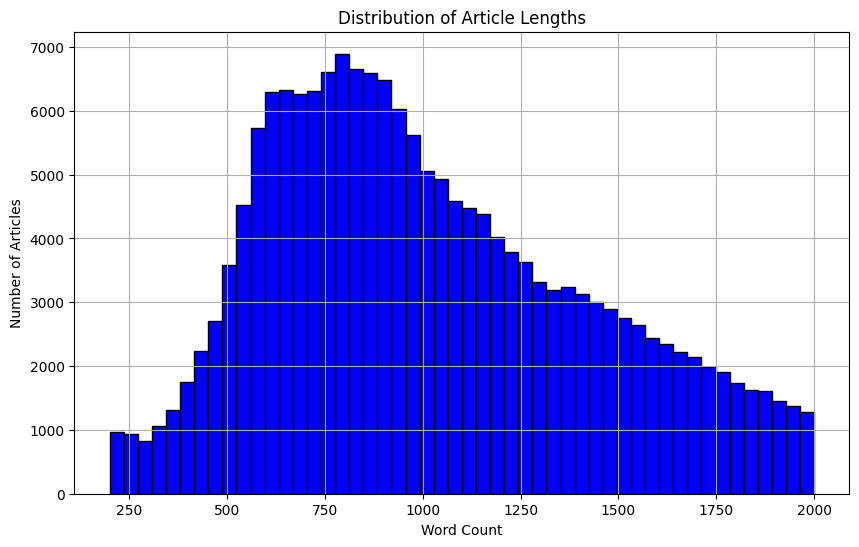

In [8]:
import matplotlib.pyplot as plt

# Assuming 'word_count' column exists in df_ai_filtered which contains the length of each article
# If 'word_count' doesn't exist, calculate it as shown in previous examples

# Plotting the distribution of article lengths
plt.figure(figsize=(10, 6))
plt.hist(df_ai_related_loaded['word_count'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Article Lengths')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


In [20]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263
5,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326
6,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529
...,...,...,...,...,...,...,...
196252,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239
196256,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060
196257,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780
196258,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661


In [18]:
!pip install ktrain


In [24]:
import ktrain
from ktrain import text as txt


news_data_list = df_ai_filtered['cleaned_text'].tolist()  # Convert the cleaned_text column to a list

# Use get_topic_model to create and train the topic model
news_ktrain_model = txt.get_topic_model(texts=news_data_list, 
                                        n_topics=10, 
                                        n_features=10000, 
                                        min_df=5, 
                                        max_df=0.5, 
                                        stop_words='english', 
                                        lda_max_iter=10, 
                                        verbose=1)



lang: en
preprocessing texts...
fitting model...
iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
done.


In [25]:
%%time
news_ktrain_model.build(news_data_list, threshold=0.2)

done.
CPU times: user 5min 4s, sys: 788 ms, total: 5min 5s
Wall time: 5min 5s


In [27]:
news_ktrain_model.print_topics(show_counts=True)


topic:5 | count:49530 | gray group platform press release solutions prnewswire customers generative statements
topic:4 | count:26104 | chatgpt openai people like says work just tech human companies
topic:6 | count:21298 | google chatgpt best users search microsoft tech like features video
topic:0 | count:20815 | share india digital subscribe policy tech read latest home email
topic:3 | count:15611 | health learning research science machine medical healthcare care clinical patients
topic:7 | count:12252 | ago weather hours video sports stories local app search file
topic:1 | count:11087 | market report global analysis growth research industry key forecast players
topic:2 | count:8127 | stock price stocks nasdaq market markets investment trading financial shares
topic:9 | count:7121 | music public facebook radio twitter search community schedule icon email
topic:8 | count:4924 | services products policy entertainment consumer releases industry resources general overview


In [33]:
# Define GCS URI for saving the model
vertex_ai_bucket_path = 'gs:\\devanshi_bucket\\k_train_model'

# Save the trained topic model to the specified GCS bucket
news_ktrain_model.save(vertex_ai_bucket_path)


In [40]:
# Initialization for pandarallel
!pip install pandarallel



9146.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.5-py3-none-any.whl size=16672 sha256=2fe5821bd30137d09bc659e3fc94643b242b475d1cbd6cf1837e7bcc286d1505
  Stored in directory: /home/jupyter/.cache/pip/wheels/50/4f/1e/34e057bb868842209f1623f195b74fd7eda229308a7352d47f
Successfully built pandarallel
INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [7]:
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [42]:
!pip install spacy

9221.71s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using cached spacy-3.7.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 27.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.9/156.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.0/493.0 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.3/922.3 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 47.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.1 MB/s eta 0:00:00


In [6]:
import spacy


# Load the English language model
nlp_spacy = spacy.load('en_core_web_sm')


In [44]:
!python -m spacy download en_core_web_sm


9284.54s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 60.2 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
# Define the function to extract entities
def extract_entities(text):
    doc = nlp_spacy(text)
    return [ent.text for ent in doc.ents if ent.label_ == "ORG"]

In [16]:
# Define the function to extract entities
def extract_entities_per(text):
    doc = nlp_spacy(text)
    return [ent.text for ent in doc.ents if ent.label_ == "PERSON"]

In [8]:
def extract_locations(text):
    doc = nlp_spacy(text)
    return [ent.text for ent in doc.ents if ent.label_ == "GPE"]


In [9]:
df_ai_filtered['location_entities'] = df_ai_filtered['cleaned_text'].parallel_apply(extract_locations)

In [14]:
# Assuming `top_10_location_entities` is a pandas Series with the index as location entities and values as counts.
# First, normalize the index by converting to lowercase and removing periods.
top_10_location_entities.index = top_10_location_entities.index.str.lower().str.replace('.', '', regex=False)

# Now group by the normalized index and sum the counts again.
top_10_location_entities = top_10_location_entities.groupby(level=0).sum()

# Sort the location entities based on counts in descending order.
top_10_location_entities = top_10_location_entities.sort_values(ascending=False)

# Take the top 10 entities.
top_10_location_entities = top_10_location_entities.head(10)

# Convert index labels to title case for presentation.
top_10_location_entities.index = top_10_location_entities.index.str.title()

# Print the updated top 10 location entities.
print("Top 10 Location Entities (Consolidated):")
print(top_10_location_entities)


Top 10 Location Entities (Consolidated):
Us            153240
India          70525
China          47377
New York       28647
Japan          24765
Texas          24398
California     24291
Washington     23284
France         21739
Name: count, dtype: int64


In [28]:

# Assuming `df_ai_filtered` is your DataFrame with a column named 'location_entities'

# Count the occurrences of each location entity
location_entity_counts = df_ai_filtered['location_entities'].explode().value_counts()

# Select the top 15 location entities
top_15_location_entities = location_entity_counts.head(15)

# Convert index labels to title case for presentation
top_15_location_entities.index = top_15_location_entities.index.str.title()

# Print the top 15 location entities
print("Top 15 Location Entities (Consolidated):")
print(top_15_location_entities)


Top 15 Location Entities (Consolidated):
location_entities
U.S.          77770
Us            75470
India         70525
China         47377
New York      28647
Japan         24765
Texas         24398
California    24291
Washington    23284
France        21739
Florida       21455
Russia        19128
Canada        18698
Uk            18249
Germany       16920
Name: count, dtype: int64


In [19]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities,filtered_person_entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]","[boen healthcare, jorgensen]"
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,Positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]","[a. derek catalano, bush, george dock]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid...","[ruth klahsen, gordon, dan chameroys, roy lewi..."
...,...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]","[mac mini, zdnet france, mac mini, sabrina ortiz]"
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ...","[jim watson, alsochina, steve wozniak, stella ..."
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,Negative,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha...","[carl pei, carl pei, carl pei, carl pei, kocha..."
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,Positive,"[chatgpt, ram mandir]","[khanirrfan khan, kochar aquarians]","[khanirrfan khan, kochar aquarians]"


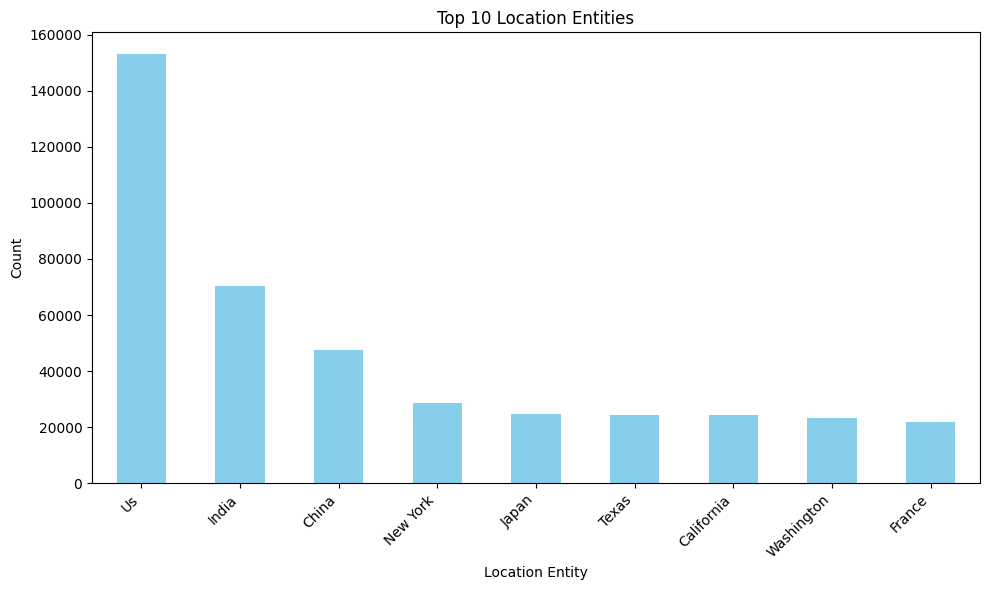

In [15]:
import matplotlib.pyplot as plt

# Assuming you have already obtained the consolidated top 10 location entities

# Initialize the plot
plt.figure(figsize=(10, 6))

# Create a bar plot
top_10_location_entities.plot(kind='bar', color='skyblue')

# Adding plot title and labels
plt.title('Top 10 Location Entities')
plt.xlabel('Location Entity')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
def filter_entities(entities_list, exclusion_criteria):
    # Exclude entities that are exactly one of the criteria or start with one of the criteria followed by a space
    return [entity for entity in entities_list if all(entity.lower() != excl and not entity.lower().startswith(excl + ' ') for excl in exclusion_criteria)]


In [34]:
entities_to_exclude = ['dr', 'mr', 'ms', 'covid', 'covid-19', 'covid19']


In [5]:
import re

def filter_entities(entities_list, exclusion_criteria):
    # Exclude entities that are exactly one of the criteria or start with one of the criteria followed by a space
    return [entity for entity in entities_list if all(re.sub(r'[^\w\s]', '', entity.lower()) != excl and not re.sub(r'[^\w\s]', '', entity.lower()).startswith(excl + ' ') for excl in exclusion_criteria)]

text_sample = """
Mr. Smith went to the store to buy groceries. He encountered a COVID-19 poster on the way. 
Ms. Johnson, his neighbor, was wearing a mask. They discussed the COVID pandemic briefly. 
Later, Dr. Brown, a renowned physician, gave a presentation on COVID-19 prevention.
"""

entities_to_exclude = ['dr', 'mr', 'ms', 'covid', 'covid-19', 'covid19']

# Function call
filtered_entities = filter_entities(re.findall(r'\w+', text_sample), entities_to_exclude)
print(filtered_entities)


['Smith', 'went', 'to', 'the', 'store', 'to', 'buy', 'groceries', 'He', 'encountered', 'a', '19', 'poster', 'on', 'the', 'way', 'Johnson', 'his', 'neighbor', 'was', 'wearing', 'a', 'mask', 'They', 'discussed', 'the', 'pandemic', 'briefly', 'Later', 'Brown', 'a', 'renowned', 'physician', 'gave', 'a', 'presentation', 'on', '19', 'prevention']


In [13]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]"
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,Positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid..."
...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]"
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ..."
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,Negative,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha..."
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,Positive,"[chatgpt, ram mandir]","[khanirrfan khan, kochar aquarians]"


In [12]:
df_ai_filtered['person_entities'] = df_ai_filtered['cleaned_text'].parallel_apply(extract_entities_per)
#entities are already extracted, but due to time constrain I did not run it again as its already there in the saved dataset

Exception ignored in: Process ForkPoolWorker-7:
<bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f65783ebac0>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
Process ForkPoolWorker-10:
Process ForkPoolWorker-9:
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/opt/conda/lib/python3.10/multiprocessing/pool.py", line 51, in starmapstar
    return list(itertools.starmap(args[0], args[1]))
  File "/opt/conda/lib/python3.10/site-packages/panda

KeyboardInterrupt: 

  File "/opt/conda/lib/python3.10/site-packages/thinc/model.py", line 310, in __call__
    return self._func(self, X, is_train=is_train)
  File "/opt/conda/lib/python3.10/site-packages/thinc/layers/chain.py", line 54, in forward
    Y, inc_layer_grad = layer(X, is_train=is_train)
  File "/opt/conda/lib/python3.10/site-packages/thinc/model.py", line 310, in __call__
    return self._func(self, X, is_train=is_train)
  File "/opt/conda/lib/python3.10/site-packages/thinc/layers/with_array.py", line 36, in forward
    return cast(Tuple[SeqT, Callable], _ragged_forward(model, Xseq, is_train))
  File "/opt/conda/lib/python3.10/site-packages/thinc/layers/with_array.py", line 91, in _ragged_forward
    Y, get_dX = layer(Xr.dataXd, is_train)
  File "/opt/conda/lib/python3.10/site-packages/thinc/model.py", line 310, in __call__
    return self._func(self, X, is_train=is_train)
  File "/opt/conda/lib/python3.10/site-packages/thinc/layers/chain.py", line 54, in forward
    Y, inc_layer_grad = layer

In [8]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]"
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,Positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid..."
...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]"
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ..."
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,Negative,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha..."
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,Positive,"[chatgpt, ram mandir]","[khanirrfan khan, kochar aquarians]"


In [15]:
# Assuming df_ai_filtered is your DataFrame and it contains the column 'filtered_person_entities'

# Importing necessary libraries
import pandas as pd

# Calculate the top 10 entities
top_entities = df_ai_filtered['filtered_person_entities'].explode().value_counts().head(10)

# Print top 10 entities
print("Top 10 entities:")
print(top_entities)


Top 10 entities:
filtered_person_entities
sam altman            14900
joe biden              4264
pichai                 3861
taylor                 3620
van susterencircle     3574
satya nadella          3096
max                    2832
mark zuckerberg        2711
khan                   2568
matt obrien            2507
Name: count, dtype: int64


In [16]:
# Save as Parquet file

#final file
df_ai_filtered.to_parquet('final_file_withall1.parquet', index=False)

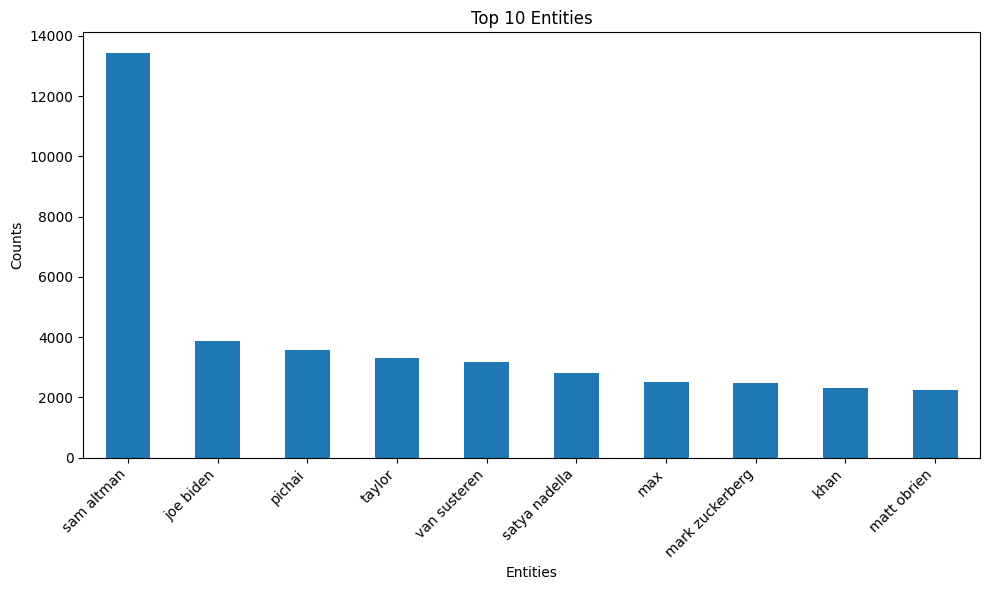

In [47]:
import matplotlib.pyplot as plt

# Assuming top_entities contains the top 10 entities with their counts

# Plotting the top 10 entities
plt.figure(figsize=(10, 6))
top_entities.plot(kind='bar')
plt.title('Top 10 Entities')
plt.xlabel('Entities')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [43]:
df_ai_filtered['person_entities']

0                              [boen healthcare, jorgensen]
1         [shomik jain, zhonghao shi, haotian mai around...
2         [covid19, covid19, ruth klahsen, gordon, covid...
3         [becomes cevas, becomes cevas, becomes cevas, ...
4                                                        []
                                ...                        
159432                                   [agosan francisco]
159433    [mac mini, zdnet france, mac mini, sabrina ortiz]
159434    [jim watson, alsochina, steve wozniak, stella ...
159435                  [khanirrfan khan, kochar aquarians]
159436    [recommendedstoriesenglish2645017newstechnolog...
Name: person_entities, Length: 159437, dtype: object

In [9]:
# Save as Parquet file

#final file
df_ai_filtered.to_parquet('final_file_withall.parquet', index=False)

In [7]:
df_ai_filtered= pd.read_parquet('final_file_withall.parquet')

In [8]:
# Display the first few rows of the DataFrame
print(df_ai_filtered.head())

                                                 url       date language  \
0  http://galusaustralis.com/2020/02/486473/legal... 2020-02-26       en   
1  http://newsparliament.com/2020/02/27/children-... 2020-02-27       en   
2  http://www.millenniumpost.in/big-stories/ai-ex... 2020-08-07       en   
3  http://www.nativestew.com/2023/11/ai-took-my-j... 2023-11-20       en   
4  http://www.pentictonherald.ca/entertainment/na... 2020-12-08       en   

                                               title  \
0  LegalTech Artificial Intelligence Market 2019 ...   
1  Children With Autism Saw Their Learning and So...   
2  Two dead as AI Express flight skids off Kozhik...   
3  Native Stew - Bahamas AI Art, Photos, Videos: ...   
4  From the Bard to broadcaster: Stratford Festiv...   

                                                text  \
0  LegalTech Artificial Intelligence Market 2019 ...   
1  \nChildren With Autism Saw Their Learning and ...   
2  Two dead as AI Express flight skids

In [10]:
# Print top 10 person entities
print("Top 10 Person Entities:")
print(df_ai_filtered['person_entities'].explode().value_counts().head(20))


Top 10 Person Entities:
person_entities
covid19               55050
sam altman            14900
dr.                    5627
joe biden              4264
pichai                 3861
taylor                 3620
van susterencircle     3574
satya nadella          3096
max                    2832
mark zuckerberg        2711
khan                   2568
matt obrien            2507
apps                   2428
putin                  2410
martin                 2382
donald trump           2372
rishi                  2344
mike                   2293
elon musk              2173
advertisingat gray     2090
Name: count, dtype: int64


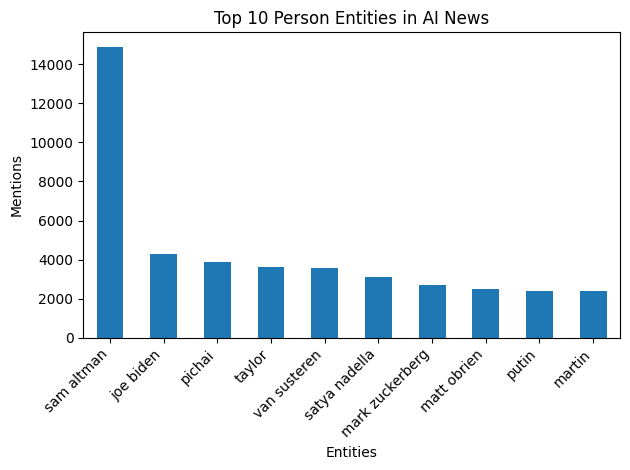

In [17]:
# Assuming df_ai_filtered['person_entities'] contains the person entities
# and that we've already removed irrelevant or generic terms like 'covid19', 'dr.', and 'mr.'

# Exploding the 'person_entities' list to rows
person_entities_exploded = df_ai_filtered['person_entities'].explode()

# Cleaning up specific entries as per request
person_entities_exploded = person_entities_exploded.str.replace('van susterencircle', 'van susteren', regex=False)

# Filtering out empty, irrelevant entries or specific words as mentioned
filtered_person_entities = person_entities_exploded[~person_entities_exploded.isin(['covid19', 'dr.', 'mr.', 'max', 'khan', 'apps'])]

# Recalculating the top 10 entities
top_10_person_entities = filtered_person_entities.value_counts().head(10)

# Plotting the top 10 person entities
top_10_person_entities.plot(kind='bar')

# Show plot with titles
plt.title('Top 10 Person Entities in AI News')
plt.xlabel('Entities')
plt.ylabel('Mentions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



In [3]:
# Import necessary libraries
import spacy

# Load the spaCy model
nlp_spacy = spacy.load("en_core_web_sm")

# Example of improved entity extraction function
def extract_entities_per(text):
    doc = nlp_spacy(text)
    entities = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            # Basic filter for length and common titles
            if len(ent.text) > 2 and not ent.text.lower().startswith(("dr ", "mr ", "ms ")):
                entities.append(ent.text)
    return entities

# Example text
text = "Dr. Smith and Mr. Khan spoke yesterday."

# Extract person entities with improved filters
people = extract_entities_per(text)

# Display the extracted entities
print(people)


['Smith', 'Khan']


In [27]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263
5,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326
6,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529
...,...,...,...,...,...,...,...
196252,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239
196256,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060
196257,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780
196258,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661


In [14]:
df_ai_related_loaded

,url,date,language,title,text,cleaned_text,word_count,entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,"[boen healthcare, jorgensen]"
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,"[shomik jain, zhonghao shi, haotian mai around..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,"[gmt kozhikode kerala, pinarayi vijayan, a.c.]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,"[a. derek catalano, bush, george dock]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,"[covid19, covid19, ruth klahsen, gordon, covid..."
...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,"[mac mini, zdnet france, mac mini, sabrina ortiz]"
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,"[jim watson, alsochina, steve wozniak, stella ..."
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,"[carl pei, carl pei, carl pei, carl pei, kocha..."
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,"[khanirrfan khan, kochar aquarians]"


In [16]:
# Save as Parquet file
df_ai_related_loaded.to_parquet('final_file_withenti.parquet', index=False)

In [18]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities,filtered_person_entities,location_entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]","[boen healthcare, jorgensen]","[midmark, medicatech, lawgeex, united states, ..."
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around...","[u.s., italy, u.s., italy, los angeles, u.s., ..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[india, dubai]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,Positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]","[a. derek catalano, bush, george dock]","[bahamas, bahamas, bahamas]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid...","[ruth klahsen, gordon, dan chameroys, roy lewi...","[toronto, u.s., netflix]"
...,...,...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]","[mac mini, zdnet france, mac mini, sabrina ortiz]","[india, united kingdom united states, germany,..."
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ...","[jim watson, alsochina, steve wozniak, stella ...","[ghana, ghana, san francisco, san francisco, g..."
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,Negative,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha...","[carl pei, carl pei, carl pei, carl pei, kocha...","[astro, picsnew delhi, delhi, india, afghanistan]"
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,Positive,"[chatgpt, ram mandir]","[khanirrfan khan, kochar aquarians]","[khanirrfan khan, kochar aquarians]","[italy, italy, bana, italy, astro, picsnew del..."


In [17]:
df_ai_filtered.to_parquet('final_file_withenti_lo_sen.parquet', index=False)

In [2]:
import pandas as pd

# Read the Parquet file
df_ai_filtered = pd.read_parquet('final_file_withenti_lo_sen.parquet')



In [22]:
# Display the dataframedf_ai_filtered)
df_ai_filtered


,url,date,language,title,text,cleaned_text,word_count,sentiment,entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska..."
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,Positive,"[junkanoo marine life montagu, wells sunrise]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ..."
...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio..."
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic..."
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,Negative,[australia test series urvashi rautela urvashi...
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,Positive,"[chatgpt, ram mandir]"


In [17]:
import pandas as pd

# Load the Parquet file into a DataFrame
df_ai_filtered = pd.read_parquet('final_file_withall1.parquet')

# Display the first few rows of the DataFrame
print(df.head())


                                                 url       date language  \
0  http://galusaustralis.com/2020/02/486473/legal... 2020-02-26       en   
1  http://newsparliament.com/2020/02/27/children-... 2020-02-27       en   
2  http://www.millenniumpost.in/big-stories/ai-ex... 2020-08-07       en   
3  http://www.nativestew.com/2023/11/ai-took-my-j... 2023-11-20       en   
4  http://www.pentictonherald.ca/entertainment/na... 2020-12-08       en   

                                               title  \
0  LegalTech Artificial Intelligence Market 2019 ...   
1  Children With Autism Saw Their Learning and So...   
2  Two dead as AI Express flight skids off Kozhik...   
3  Native Stew - Bahamas AI Art, Photos, Videos: ...   
4  From the Bard to broadcaster: Stratford Festiv...   

                                                text  \
0  LegalTech Artificial Intelligence Market 2019 ...   
1  \nChildren With Autism Saw Their Learning and ...   
2  Two dead as AI Express flight skids

In [2]:
import pandas as pd

# Read the Parquet file
df_ai_filtered = pd.read_parquet('final_file_withall1.parquet')

# Display the dataframe
print(df_ai_filtered)



                                                      url       date language  \
0       http://galusaustralis.com/2020/02/486473/legal... 2020-02-26       en   
1       http://newsparliament.com/2020/02/27/children-... 2020-02-27       en   
2       http://www.millenniumpost.in/big-stories/ai-ex... 2020-08-07       en   
3       http://www.nativestew.com/2023/11/ai-took-my-j... 2023-11-20       en   
4       http://www.pentictonherald.ca/entertainment/na... 2020-12-08       en   
...                                                   ...        ...      ...   
176901  https://www.zdnet.com/article/chatgpt-is-the-m... 2023-05-02       en   
176902  https://yen.com.gh/business-economy/231589-twi... 2023-04-12       en   
176903  https://zeenews.india.com/companies/one-ai-kil... 2022-12-31       en   
176904  https://zeenews.india.com/technology/openai-re... 2023-04-29       en   
176905  https://zeenews.india.com/technology/young-kol... 2023-08-05       en   

                           

In [2]:
import pandas as pd

# Read the Parquet file
df_ai_filtered = pd.read_parquet('final_file_withall1.parquet')

# Display the dataframe
print(df_ai_filtered)


                                                      url       date language  \
0       http://galusaustralis.com/2020/02/486473/legal... 2020-02-26       en   
1       http://newsparliament.com/2020/02/27/children-... 2020-02-27       en   
2       http://www.millenniumpost.in/big-stories/ai-ex... 2020-08-07       en   
3       http://www.nativestew.com/2023/11/ai-took-my-j... 2023-11-20       en   
4       http://www.pentictonherald.ca/entertainment/na... 2020-12-08       en   
...                                                   ...        ...      ...   
176901  https://www.zdnet.com/article/chatgpt-is-the-m... 2023-05-02       en   
176902  https://yen.com.gh/business-economy/231589-twi... 2023-04-12       en   
176903  https://zeenews.india.com/companies/one-ai-kil... 2022-12-31       en   
176904  https://zeenews.india.com/technology/openai-re... 2023-04-29       en   
176905  https://zeenews.india.com/technology/young-kol... 2023-08-05       en   

                           

In [3]:
df_ai_filtered['sentiment']

0         Positive
1         Positive
2         Negative
3         Positive
4         Positive
            ...   
176901    Positive
176902    Positive
176903    Negative
176904    Positive
176905    Positive
Name: sentiment, Length: 176906, dtype: object

In [4]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]"
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,Positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid..."
...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]"
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ..."
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,Negative,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha..."
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,Positive,"[chatgpt, ram mandir]","[khanirrfan khan, kochar aquarians]"


In [74]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 3.1 MB/s eta 0:00:0000:0100:01


In [ ]:
# Import the necessary modules
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from collections import Counter

# Function to train LDA model
def train_lda_model(corpus, dictionary, num_topics):
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, iterations=100, alpha=1, eta=0.01)
    return lda_model

# Step 1: Prepare the text data
# Tokenize the text
nlp = spacy.load("en_core_web_sm")
df_ai_filtered['cleaned_documents_spacy'] = df_ai_filtered['cleaned_text'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if not token.is_stop]))

# Create bag-of-words representation for news
vectorizer_news = CountVectorizer()
news_bow = vectorizer_news.fit_transform(df_ai_filtered['cleaned_documents_spacy'])

# Tokenize the text and create a dictionary
news_tokenized = [word_tokenize(text) for text in df_ai_filtered['cleaned_documents_spacy']]
news_dictionary = corpora.Dictionary(news_tokenized)

# Create the corpus using the dictionary
news_corpus = [news_dictionary.doc2bow(text) for text in news_tokenized]



In [ ]:
# Step 2: Train the LDA model
num_topics = 5  # Define the number of topics
lda_model = train_lda_model(news_corpus, news_dictionary, num_topics)

# Step 3: Extract topics for each document
df_ai_filtered['lda_topics'] = df_ai_filtered['cleaned_documents_spacy'].apply(lambda x: lda_model.get_document_topics(news_dictionary.doc2bow(word_tokenize(x))))

# Display the topics for each document
print(df_ai_filtered[['cleaned_text', 'lda_topics']])


In [29]:
df_ai_related

,url,date,language,title,text,cleaned_text,word_count
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553
2,http://www.agoravox.it/Covid-19-un-messaggio-d...,2020-03-13,en,Covid-19: un messaggio dai ricercatori italian...,\n\n\nCovid-19: un messaggio dai ricercatori i...,covid19 un messaggio dai ricercatori italiani ...,2039
3,http://www.desototimes.com/news/child-actor-cl...,2022-06-09,en,Child actor Claude Jarman Jr. looks back on hi...,\nChild actor Claude Jarman Jr. looks back on ...,child actor claude jarman jr. looks back on hi...,2845
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263
...,...,...,...,...,...,...,...
196255,https://www.zdnet.com/article/google-cloud-exp...,2023-08-29,en,Google Cloud expands developer tools and data ...,\n\n\nGoogle Cloud expands developer tools and...,google cloud expands developer tools and data ...,2876
196256,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060
196257,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780
196258,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661


In [26]:
df_ai_related

,url,date,language,title,text,clean_text,lowercase_text,entities
0,https://kfor.com/news/nexstar-media-wire/with-...,2023-01-29,en,"With ChatGPT rising in popularity, what’s a pa...",\n\n \n\n \n\nWith ChatGPT rising in popular...,"with chatgpt rising in popularity, whats a par...","with chatgpt rising in popularity, whats a par...","[died2, womenbestreviews daily, chatgpt, chatg..."
1,https://www.kalb.com/prnewswire/2022/06/28/fat...,2022-06-28,en,"FatBrain Acquires Prime Source, Accelerating A...","FatBrain Acquires Prime Source, Accelerating A...","fatbrain acquires prime source, accelerating a...","fatbrain acquires prime source, accelerating a...","[fatbrain ailzg international inc., lzg intern..."
2,https://www.sciencedaily.com/releases/2021/05/...,2023-11-30,en,Making AI algorithms show their work | Science...,\n\nMaking AI algorithms show their work | Sci...,making ai algorithms show their work scienceda...,making ai algorithms show their work scienceda...,"[koo, worlds?mar, science newslatest newshealth]"
3,https://im-news.com/how-b2b-marketers-can-acce...,2022-01-30,en,How B2B marketers can accelerate AI to deliver...,\n\nHow B2B marketers can accelerate AI to del...,how b2b marketers can accelerate ai to deliver...,how b2b marketers can accelerate ai to deliver...,[]
4,https://www.canindia.com/openai-announces-chat...,2023-03-02,en,"OpenAI announces ChatGPT, Whisper APIs for dev...","\n\nOpenAI announces ChatGPT, Whisper APIs fo...","openai announces chatgpt, whisper apis for dev...","openai announces chatgpt, whisper apis for dev...","[canindia news sign, password?password, un, un..."
5,https://www.producthunt.com/posts/simulai-2,2023-05-29,en,simulai - Use AI to generate your blog automa...,simulai - Use AI to generate your blog automa...,simulai use ai to generate your blog automatic...,simulai use ai to generate your blog automatic...,"[connectstoriestech news, simulaisee simulais ..."
6,https://www.onenewspage.com/n/Internet/1zn2qc8...,2021-07-05,en,Tesla’s AI chief: Self-driving cars don’t need...,\n\n\nTesla’s AI chief: Self-driving cars don’...,teslas ai chief selfdriving cars dont need one...,teslas ai chief selfdriving cars dont need one...,[sports newsnflmlbmlsnbanhlncaafootballbritish...
7,https://www.kfyrtv.com/prnewswire/2023/08/28/b...,2023-08-28,en,Bright Pattern Partners with MoData in South A...,Bright Pattern Partners with MoData in South A...,bright pattern partners with modata in south a...,bright pattern partners with modata in south a...,"[modatas, media group, inc., gray television, ..."
8,https://www.latestly.com/agency-news/latest-ne...,2021-05-06,en,Latest News | Industry Should Start Working on...,\nLatest News | Industry Should Start Working ...,latest news industry should start working on a...,latest news industry should start working on a...,"[uefa champions league final match, rocket lea..."
9,https://www.wabi.tv/prnewswire/2023/05/11/sap-...,2023-05-11,en,SAP and Google Cloud Expand Partnership to Bui...,SAP and Google Cloud Expand Partnership to Bui...,sap and google cloud expand partnership to bui...,sap and google cloud expand partnership to bui...,"[google, sap systems, google, google, sap soft..."


In [28]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market techn...,909,"[legaltech, casetext inc catalyst, apollo, son..."
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1527,"[dettol, the university of southern california..."
4,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,254,[hocalwirewe]
5,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...",native stew bahamas ai art photos videos ai to...,267,"[junkanoo marine life montagu, wells sunrise]"
6,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1525,"[national news world news medical foundation, ..."
...,...,...,...,...,...,...,...,...
195980,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1217,"[chatgpt, congress, google microsoft professio..."
195984,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1039,"[apple, google meta, microsoft, microsoft, kfc..."
195985,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge nothing founder ...,752,"[kochar, netizens, australia test series urvas..."
195986,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,651,[ram mandir]


In [30]:
df_ai_filtered['entities']

0         [legaltech, casetext inc., apollo, sony, heska...
1         [dettol, the university of southern california...
4                              [airportxians7, hocalwirewe]
5             [junkanoo marine life montagu, wells sunrise]
6         [national news world news medical foundation, ...
                                ...                        
196252    [chatgpt, congress, google microsoft professio...
196256    [telegram, apple, musk.read, google, meta, mic...
196257    [australia test series urvashi rautela urvashi...
196258                                [chatgpt, ram mandir]
196259    [the indian institute of science education, th...
Name: entities, Length: 176906, dtype: object

In [25]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities,filtered_person_entities,location_entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]","[boen healthcare, jorgensen]","[midmark, medicatech, lawgeex, united states, ..."
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around...","[u.s., italy, u.s., italy, los angeles, u.s., ..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[india, dubai]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,Positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]","[a. derek catalano, bush, george dock]","[bahamas, bahamas, bahamas]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid...","[ruth klahsen, gordon, dan chameroys, roy lewi...","[toronto, u.s., netflix]"
...,...,...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]","[mac mini, zdnet france, mac mini, sabrina ortiz]","[india, united kingdom united states, germany,..."
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ...","[jim watson, alsochina, steve wozniak, stella ...","[ghana, ghana, san francisco, san francisco, g..."
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,Negative,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha...","[carl pei, carl pei, carl pei, carl pei, kocha...","[astro, picsnew delhi, delhi, india, afghanistan]"
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,Positive,"[chatgpt, ram mandir]","[khanirrfan khan, kochar aquarians]","[khanirrfan khan, kochar aquarians]","[italy, italy, bana, italy, astro, picsnew del..."


In [32]:
from collections import Counter

# Flatten the list of entities and count each occurrence
all_entities = [entity for sublist in df_ai_filtered['entities'] for entity in sublist]
entity_counts = Counter(all_entities)

# Display the most common entities
print(entity_counts.most_common(10))


[('microsoft', 99361), ('google', 83766), ('gray television, inc', 44104), ('media group, inc.', 39969), ('fcc', 35246), ('ibm', 34903), ('intel', 19555), ('samsung', 15505), ('npr', 13896), ('gpt', 13734)]


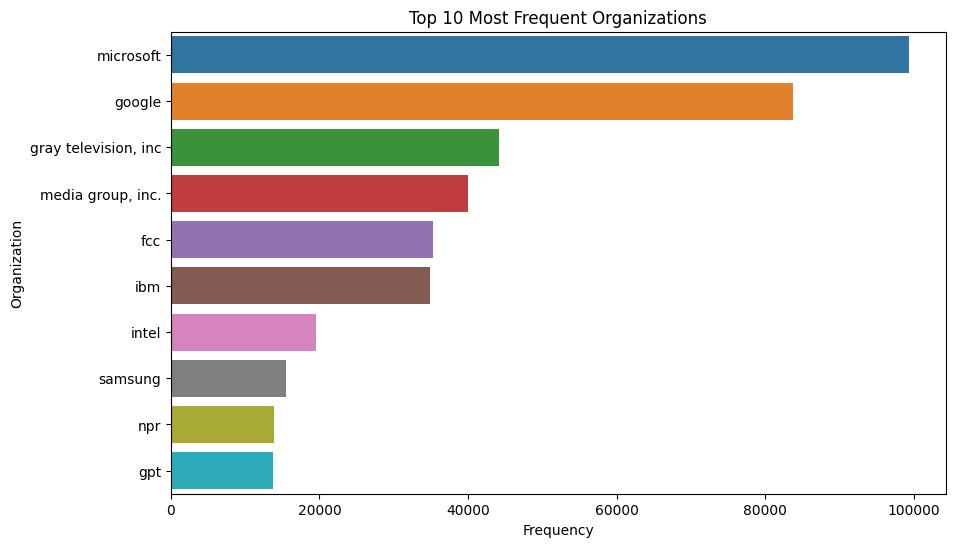

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the most common entities to a DataFrame for easier plotting
df_common_entities = pd.DataFrame(entity_counts.most_common(10), columns=['Entity', 'Count'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Entity', data=df_common_entities)
plt.title('Top 10 Most Frequent Organizations')
plt.xlabel('Frequency')
plt.ylabel('Organization')
plt.show()


In [56]:
# Example: Exploring articles mentioning a specific entity
specific_entity = 'google'  # Example entity
filtered_articles = df_ai_filtered[df_ai_filtered['cleaned_text'].str.contains(specific_entity)]

print(f"Number of articles mentioning {specific_entity}: {len(filtered_articles)}")
print("\nSample article mentioning {}: ".format(specific_entity))
print(filtered_articles.iloc[0]['cleaned_text'])  # Displaying the text of the first article mentioning the entity


Number of articles mentioning google: 57235

Sample article mentioning google: 
legaltech artificial intelligence market  technology advancement and future scope  casetext inc catalyst repository systems ebrevia  galus australis            galus australis  businessgeneral newshealthcareindustryinternationallifestylescitech  wednesday february    trending  needle counters market comprehensive study by companies medline industries boen healthcare skin scrub trays market comprehensive study by companies medline industries bd deroyal global portable handheld electronic game machine market outlook and business insights  apollo games sony aristocrat leisure igt infectious disease testing using pcr for ivd market comprehensive study by companies thermo fisher bd roche diagnostics veterinary dental xray generators market comprehensive study by companies planmeca midmark medicatech usa veterinary ophthalmoscopes market comprehensive study by companies heine optotechnik gowllands limited veterin

In [61]:
!pip install --upgrade tensorflow


22215.58s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [34]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:0000:010:01


In [7]:
#Sentiment using vader sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to perform sentiment analysis on each text
def analyze_sentiment(text):
    # Perform sentiment analysis
    sentiment_scores = analyzer.polarity_scores(text)
    # Determine sentiment label based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [8]:
# Assuming df_news_final_project_filtered['further_cleaned_text'] contains the text data
# Apply sentiment analysis to each text in the DataFrame
df_ai_related_loaded['sentiment'] = df_ai_related_loaded['cleaned_text'].parallel_apply(analyze_sentiment)



In [51]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,person_entities,filtered_person_entities,personentities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,"[boen healthcare, jorgensen]","[boen healthcare, jorgensen]","[boen healthcare, jorgensen]"
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,"[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,"[covid19, covid19, ruth klahsen, gordon, covid...","[ruth klahsen, gordon, dan chameroys, roy lewi...","[gmt kozhikode kerala, pinarayi vijayan, a.c.]"
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,"[becomes cevas, becomes cevas, becomes cevas, ...","[becomes cevas, becomes cevas, becomes cevas, ...","[a. derek catalano, bush, george dock]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,[],[],"[covid19, covid19, ruth klahsen, gordon, covid..."
...,...,...,...,...,...,...,...,...,...,...
159432,https://thetyee.ca/News/2021/06/10/RCMP-Fails-...,2021-06-11,en,RCMP Fails to Explain How It Used Clearview AI...,\n\nRCMP Fails to Explain How It Used Clearvi...,rcmp fails to explain how it used clearview ai...,1876,[agosan francisco],[agosan francisco],"[bryan carney, bryan carney, charlie, daniel t..."
159433,https://thewest.com.au/opinion/kate-emery-why-...,2023-08-12,en,Kate Emery: Why artificial intelligence will b...,\n\nKate Emery: Why artificial intelligence wi...,kate emery why artificial intelligence will br...,452,"[mac mini, zdnet france, mac mini, sabrina ortiz]","[mac mini, zdnet france, mac mini, sabrina ortiz]","[kate, lawbasil zempilasjoe, james cameron, ro..."
159434,https://thewest.com.au/politics/federal-politi...,2023-11-21,en,Social media platforms told to crackdown on ha...,\n\nSocial media platforms told to crackdown o...,social media platforms told to crackdown on ha...,702,"[jim watson, alsochina, steve wozniak, stella ...","[jim watson, alsochina, steve wozniak, stella ...","[lawbasil zempilasjoe, dan jervisbardycamera, ..."
159435,https://ticker.tv/news/how-can-you-tell-if-som...,2023-12-17,en,How can you tell if someone is using ChatGPT?,How can you tell if someone is using ChatGP...,how can you tell if someone is using chatgpt? ...,585,"[khanirrfan khan, kochar aquarians]","[khanirrfan khan, kochar aquarians]",[tanya king post date]


In [50]:
print(df_ai_filtered['cleaned_text'].head())


0    legaltech artificial intelligence market 2019 ...
1    children with autism saw their learning and so...
2    two dead as ai express flight skids off kozhik...
3    native stew bahamas ai art, photos, videos ai ...
4    from the bard to broadcaster stratford festiva...
Name: cleaned_text, dtype: object


In [19]:
import re
from spacy.lang.en.stop_words import STOP_WORDS

# Function to preprocess text for sentiment analysis
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stop words
    tokens = [token for token in text.split() if token not in STOP_WORDS]
    # Rejoin tokens into a string
    return ' '.join(tokens)

# Apply the preprocessing function to your text column
df_ai_filtered['preprocessed_text'] = df_ai_filtered['cleaned_text'].apply(preprocess_text)

# Check the preprocessed text
print(df_ai_filtered['preprocessed_text'].head())


0    legaltech artificial intelligence market techn...
1    children autism saw learning social skills boo...
2    dead ai express flight skids kozhikode airport...
3    native stew bahamas ai art photos videos ai to...
4    bard broadcaster stratford festival builds new...
Name: preprocessed_text, dtype: object


In [54]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment using VADER
def vader_sentiment(text):
    # Get the sentiment scores
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']  # Returns the compound score

# Apply the sentiment function to your preprocessed text column
df_ai_filtered['vader_sentiment'] = df_ai_filtered['preprocessed_text'].parallel_apply(vader_sentiment)

#model was  already implmeneted but I did not run it again due to lack of time thats why its showing error but you can see the results below


/var/tmp/ipykernel_5026/2908547969.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai_filtered['vader_sentiment'] = df_ai_filtered['preprocessed_text'].parallel_apply(vader_sentiment)


In [55]:
# Convert compound scores to categorical sentiment labels
def get_sentiment_label(score, threshold=0.05):
    if score > threshold:
        return 'positive'
    elif score < -threshold:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment label function to the compound scores
df_ai_filtered['sentiment_label'] = df_ai_filtered['vader_sentiment'].parallel_apply(get_sentiment_label)

# Check the sentiment labels
print(df_ai_filtered[['cleaned_text', 'vader_sentiment', 'sentiment_label']].head())

/var/tmp/ipykernel_5026/2825044254.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ai_filtered['sentiment_label'] = df_ai_filtered['vader_sentiment'].parallel_apply(get_sentiment_label)


                                        cleaned_text  vader_sentiment  \
0  legaltech artificial intelligence market 2019 ...           0.9990   
1  children with autism saw their learning and so...           0.9990   
2  two dead as ai express flight skids off kozhik...          -0.9755   
3  native stew bahamas ai art, photos, videos ai ...           0.9246   
4  from the bard to broadcaster stratford festiva...           0.9993   

  sentiment_label  
0        positive  
1        positive  
2        negative  
3        positive  
4        positive  


In [63]:
# Group by sentiment and calculate the total count of each sentiment category
sentiment_counts = df_ai_filtered['sentiment_label'].value_counts()

# Print the counts for each sentiment category
print("Sentiment Counts:")
print(sentiment_counts)


Sentiment Counts:
sentiment_label
positive    150765
negative      8461
neutral        211
Name: count, dtype: int64


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import requests
import json

# Load Yelp data
directory = 'https://storage.googleapis.com/msca-bdp-data-open/yelp/'
fileName = 'yelp_train_sentiment.json'
path = directory + fileName

# Assuming you have direct access to the file system
# If you don't have direct access, you might need to use requests or a similar method to access the content
yelp = pd.read_json(path, orient='records', lines=True)

# define X and y from Yelp dataset
X = yelp['text']
y = yelp['label']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create pipeline with CountVectorizer and SGDClassifier
pipe_svm = make_pipeline(
    CountVectorizer(lowercase=False, stop_words='english', ngram_range=(1,3)),
    SGDClassifier(max_iter=100, tol=None, loss='log_loss') 
)

# Fit the pipeline on Yelp training data
pipe_svm.fit(X_train, y_train)



Pipeline(steps=[('countvectorizer',
                 CountVectorizer(lowercase=False, ngram_range=(1, 3),
                                 stop_words='english')),
                ('sgdclassifier',
                 SGDClassifier(loss='log_loss', max_iter=100, tol=None))])

In [22]:
# Assuming df_ai_filtered['cleaned_text'] is the preprocessed text you want to analyze
# Predict probabilities for the AI-related dataset
ai_probabilities = pipe_svm.predict_proba(df_ai_filtered['cleaned_text'])

# Define a threshold for classifying a sentiment as positive or negative
# Adjust this threshold based on your specific requirements or based on model evaluation
threshold = 0.3

# Apply the threshold to the predicted probabilities to assign sentiment labels
# Assumes that the second column (index 1) corresponds to the 'positive' class
df_ai_filtered['sentiment'] = ['positive' if prob[1] > threshold else 'negative' for prob in ai_probabilities]

# Now df_ai_filtered contains a 'sentiment' column with the predicted sentiment label
print(df_ai_filtered[['cleaned_text', 'sentiment']].head())


                                        cleaned_text sentiment
0  legaltech artificial intelligence market 2019 ...  negative
1  children with autism saw their learning and so...  negative
2  two dead as ai express flight skids off kozhik...  negative
3  native stew bahamas ai art, photos, videos ai ...  positive
4  from the bard to broadcaster stratford festiva...  negative


In [23]:
# Group by sentiment and calculate the total count of each sentiment category
sentiment_counts = df_ai_filtered['sentiment'].value_counts()

# Print the counts for each sentiment category
print("Sentiment Counts:")
print(sentiment_counts)

Sentiment Counts:
sentiment
negative    130227
positive     46679
Name: count, dtype: int64


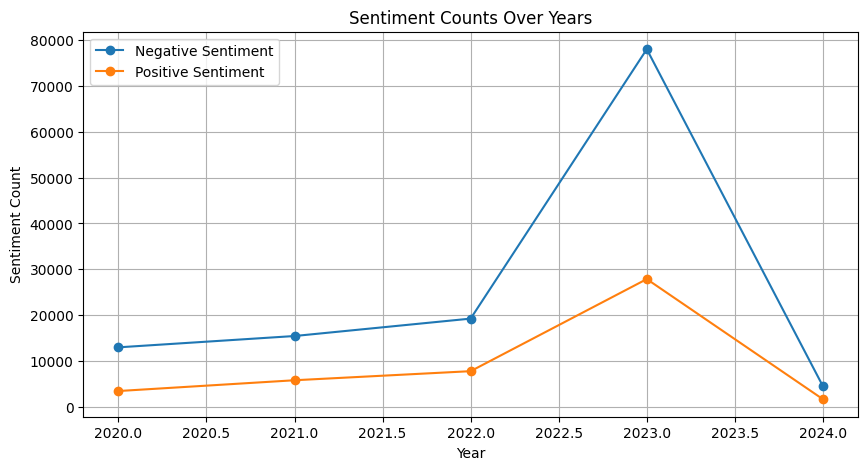

In [24]:
import matplotlib.pyplot as plt
import pandas as pd


df_ai_filtered['date'] = pd.to_datetime(df_ai_filtered['date'])

# Group by year and sentiment label, then count occurrences
sentiment_counts_yearly = df_ai_filtered.groupby([df_ai_filtered['date'].dt.year, 'sentiment']).size().unstack().fillna(0)

# Plot the line graph for sentiment counts over years
plt.figure(figsize=(10, 5))
for sentiment in sentiment_counts_yearly.columns:
    plt.plot(sentiment_counts_yearly.index, sentiment_counts_yearly[sentiment], marker='o', label=sentiment.capitalize() + ' Sentiment')

plt.title('Sentiment Counts Over Years')
plt.xlabel('Year')
plt.ylabel('Sentiment Count')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities,filtered_person_entities,preprocessed_text
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,negative,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]","[boen healthcare, jorgensen]",legaltech artificial intelligence market techn...
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,negative,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around...",children autism saw learning social skills boo...
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]",dead ai express flight skids kozhikode airport...
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]","[a. derek catalano, bush, george dock]",native stew bahamas ai art photos videos ai to...
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,negative,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid...","[ruth klahsen, gordon, dan chameroys, roy lewi...",bard broadcaster stratford festival builds new...
...,...,...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]","[mac mini, zdnet france, mac mini, sabrina ortiz]",chatgpt sought tech skill workforce says learn...
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,negative,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ...","[jim watson, alsochina, steve wozniak, stella ...",twitter working ai despite musk global pause r...
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,positive,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha...","[carl pei, carl pei, carl pei, carl pei, kocha...",ai killer app emerge founder carl pei makes pr...
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,negative,"[chatgpt, ram mandir]","[khanirrfan khan, kochar aquarians]","[khanirrfan khan, kochar aquarians]",openai restores access chatgpt italy ban techn...


In [33]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities,filtered_person_entities,preprocessed_text,industry,sector
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,negative,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]","[boen healthcare, jorgensen]",legaltech artificial intelligence market techn...,Technology,Technology
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,negative,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around...",children autism saw learning social skills boo...,Technology,Technology
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]",dead ai express flight skids kozhikode airport...,Technology,Technology
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]","[a. derek catalano, bush, george dock]",native stew bahamas ai art photos videos ai to...,Other,Technology
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,negative,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid...","[ruth klahsen, gordon, dan chameroys, roy lewi...",bard broadcaster stratford festival builds new...,Healthcare,Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]","[mac mini, zdnet france, mac mini, sabrina ortiz]",chatgpt sought tech skill workforce says learn...,Technology,Technology
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,negative,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ...","[jim watson, alsochina, steve wozniak, stella ...",twitter working ai despite musk global pause r...,Technology,Technology
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,positive,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha...","[carl pei, carl pei, carl pei, carl pei, kocha...",ai killer app emerge founder carl pei makes pr...,Technology,Technology
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy

In [74]:
# Identify top candidates for AI integration by looking for patterns or frequent topics associated with strong sentiment
top_candidates = df_ai_filtered[df_ai_filtered['sentiment'] == 'positive']['cleaned_text']

In [75]:
print(top_candidates)

3         native stew bahamas ai art, photos, videos ai ...
10        put your best ai self forward with vidboard cr...
11        sharks ai ultra voicecontrolled robot vacuum w...
16        one punch man a fan imagined king in reality t...
18        pic of the day bella dante features in edition...
                                ...                        
159402    during io, google is expected to announce mult...
159405    google brings more ai tools to workspace techc...
159406    amazon is bringing generative ai to fire tv al...
159408    sam altman to return as openai ceo under new b...
159415    how shoring up drones with artificial intellig...
Name: cleaned_text, Length: 41563, dtype: object


In [95]:
# Assuming you have lists of top organizations and people
top_organizations = ['Microsoft', 'Google', 'Gray Television, Inc', 'Media Group, Inc.', 'FCC', 'IBM', 'Intel', 'Samsung', 'NPR', 'GPT']
top_people = ['Sam Altman', 'Joe Biden', 'Pichai', 'Taylor', 'Van Susteren', 'Satya Nadella', 'Max', 'Mark Zuckerberg', 'Khan', 'Matt OBrien']

# Combine top entities for analysis
top_entities = top_organizations + top_people

# Function to calculate sentiment distribution for an entity
def sentiment_distribution_for_entity(entity, dataframe):
    # Filter dataframe for rows containing the entity in 'cleaned_text'
    df_entity = dataframe[dataframe['cleaned_text'].str.contains(entity, case=False, na=False)]
    # Get sentiment counts
    sentiment_counts = df_entity['sentiment'].value_counts(normalize=True) * 100  # Convert to percentage
    return sentiment_counts

# Analyze sentiment distribution for each top entity
entity_sentiment_distribution = {}
for entity in top_entities:
    entity_sentiment_distribution[entity] = sentiment_distribution_for_entity(entity, df_ai_filtered)

# Display the sentiment distribution for each entity
for entity, distribution in entity_sentiment_distribution.items():
    print(f"Entity: {entity}, Sentiment Distribution: {distribution}\n")


Entity: Microsoft, Sentiment Distribution: sentiment
negative    78.215753
positive    21.784247
Name: proportion, dtype: float64

Entity: Google, Sentiment Distribution: sentiment
negative    76.174497
positive    23.825503
Name: proportion, dtype: float64

Entity: Gray Television, Inc, Sentiment Distribution: sentiment
negative    63.909385
positive    36.090615
Name: proportion, dtype: float64

Entity: Media Group, Inc., Sentiment Distribution: sentiment
negative    64.010739
positive    35.989261
Name: proportion, dtype: float64

Entity: FCC, Sentiment Distribution: sentiment
negative    72.182417
positive    27.817583
Name: proportion, dtype: float64

Entity: IBM, Sentiment Distribution: sentiment
negative    76.627984
positive    23.372016
Name: proportion, dtype: float64

Entity: Intel, Sentiment Distribution: sentiment
negative    75.64568
positive    24.35432
Name: proportion, dtype: float64

Entity: Samsung, Sentiment Distribution: sentiment
negative    63.896458
positive    

In [27]:
# Function to categorize articles into sectors based on keywords
def categorize_by_sector(text):
    if any(keyword in text for keyword in ['ai', 'technology', 'chatgpt', 'openai']):
        return 'Technology'
    elif any(keyword in text for keyword in ['health', 'medical', 'healthcare']):
        return 'Healthcare'
    elif any(keyword in text for keyword in ['finance', 'stock', 'market']):
        return 'Finance'
    elif any(keyword in text for keyword in ['media', 'entertainment', 'digital policy']):
        return 'Media and Entertainment'
    else:
        return 'Other'

# Apply the categorization function to your DataFrame
df_ai_filtered['sector'] = df_ai_filtered['cleaned_text'].apply(categorize_by_sector)

# Calculate sentiment distribution by sector
sentiment_distribution_by_sector = df_ai_filtered.groupby(['sector', 'sentiment']).size().unstack().fillna(0)
print(sentiment_distribution_by_sector)


sentiment                negative  positive
sector                                     
Finance                       1.0      11.0
Healthcare                    1.0       1.0
Media and Entertainment       0.0       1.0
Other                         3.0       4.0
Technology               130222.0   46662.0


In [5]:
technology_areas = {
    "Technology and AI Innovations": [
        'artificial intelligence', 'AI', 'machine learning', 'deep learning', 
        'neural networks', 'natural language processing', 'NLP', 'computer vision', 
        'robotics', 'intelligent systems', 'automation', 'algorithms', 'data science', 
        'data analytics', 'predictive analytics', 'big data', 'reinforcement learning'
    ],
    "Digital Media and Policy": [
        'digital transformation', 'cybersecurity', 'data privacy', 'digital policy', 
        'technology adoption', 'information security', 'digital governance', 
        'digital ethics', 'regulatory compliance', 'data governance', 'privacy regulations'
    ],
    "Healthcare and Life Sciences": [
        'telemedicine', 'genomics', 'robotic surgery', 'biotechnology', 
        'medical imaging', 'health informatics', 'precision medicine', 
        'medical devices', 'personalized medicine', 'healthcare analytics', 
        'healthcare IT', 'clinical trials', 'biomedical engineering'
    ],
    "Financial Services": [
        'fintech', 'blockchain', 'cryptocurrency', 'financial technology', 
        'digital banking', 'payment processing', 'insurtech', 'robo-advisors', 
        'regtech', 'digital currencies', 'smart contracts', 'financial regulations'
    ],
    "Media and Entertainment": [
        'streaming services', 'virtual reality', 'augmented reality', 
        'gaming industry', 'online content', 'music streaming', 
        'social media platforms', 'video streaming', 'content creation', 
        'digital media consumption', 'entertainment technology'
    ],
      "E-commerce and Retail": [
        'e-commerce', 'online shopping', 'retail technology', 'recommendation engines', 
        'personalized shopping', 'inventory management', 'customer segmentation', 
        'supply chain optimization', 'fraud detection', 'price optimization', 
        'customer service automation'
    ],
    "Manufacturing and Industrial Automation": [
        'industrial automation', 'smart manufacturing', 'predictive maintenance', 
        'quality control', 'robotic process automation', 'supply chain management', 
        'asset tracking', 'production optimization', 'smart factories', 
        'autonomous vehicles', 'internet of things', 'industrial IoT'
    ],
    "Education and E-learning": [
        'e-learning', 'educational technology', 'online learning platforms', 
        'adaptive learning', 'virtual classrooms', 'personalized learning', 
        'intelligent tutoring systems', 'educational data mining', 'student analytics', 
        'automated grading', 'learning management systems', 'AI tutors'
    ],
    "Transportation and Logistics": [
        'autonomous vehicles', 'self-driving cars', 'logistics optimization', 
        'route planning', 'delivery drones', 'fleet management', 'last-mile delivery', 
        'predictive maintenance', 'transportation analytics', 'smart transportation', 
        'supply chain management', 'freight forwarding'
    ],
    "Energy and Sustainability": [
        'energy optimization', 'smart grid', 'renewable energy', 'energy management', 
        'smart buildings', 'predictive maintenance', 'environmental monitoring', 
        'resource optimization', 'sustainable technology', 'climate change mitigation', 
        'energy-efficient systems', 'green technology'
    ]
}

# Example function to associate keywords with sentiment counts (simplified)
def associate_keywords_sentiment(df, technology_areas):
    results = {}
    for area, keywords in technology_areas.items():
        area_df = df_ai_filtered[df_ai_filtered['cleaned_text'].str.contains('|'.join(keywords), case=False, na=False)]
        if not area_df.empty:
            sentiment_counts = area_df['sentiment'].value_counts()  # Count occurrences of 'positive' and 'negative' sentiments
            results[area] = sentiment_counts
    return results

technology_sentiment_counts = associate_keywords_sentiment(df_ai_filtered, technology_areas)
print(technology_sentiment_counts)


{'Technology and AI Innovations': sentiment
Positive    165927
Negative     10874
Neutral        105
Name: count, dtype: int64, 'Digital Media and Policy': sentiment
Positive    28395
Negative      960
Neutral         4
Name: count, dtype: int64, 'Healthcare and Life Sciences': sentiment
Positive    13026
Negative      370
Neutral         3
Name: count, dtype: int64, 'Financial Services': sentiment
Positive    22299
Negative      539
Neutral         5
Name: count, dtype: int64, 'Media and Entertainment': sentiment
Positive    13125
Negative      664
Neutral         6
Name: count, dtype: int64, 'E-commerce and Retail': sentiment
Positive    3469
Negative     137
Name: count, dtype: int64, 'Manufacturing and Industrial Automation': sentiment
Positive    15212
Negative      180
Name: count, dtype: int64, 'Education and E-learning': sentiment
Positive    1320
Negative      16
Name: count, dtype: int64, 'Transportation and Logistics': sentiment
Positive    6125
Negative      61
Name: count,

In [45]:
new_technologies = ['chatbot', 'natural language generation', 'genAI', 'genai', 'gpt4', 'chatgpt',
                    'neural networks', 'computer vision', 'reinforcement learning', 'autonomous vehicles', 
                    'edge computing', 'quantum computing', '5G technology', 'Internet of Things (IoT)', 
                    'augmented reality', 'virtual reality', 'blockchain technology', 'edge AI', 'federated learning', 
                    'biotechnology', 'nanotechnology', 'predictive analytics', 'cybersecurity', 'robotic process automation', 
                    'smart cities', 'voice assistants', 'biometric authentication', 'distributed ledger technology', 
                    'cloud computing', 'big data analytics', 'wearable technology', 'genetic engineering', 'precision agriculture', 
                    'smart homes', 'smart grids', 'self-driving cars', 'biocomputing', 'bioinformatics', 'CRISPR technology', 
                    'decentralized finance (DeFi)', 'metaverse', 'digital twins', 'artificial general intelligence (AGI)', 
                    'edgeAI', 'synthetic biology', 'human augmentation', 'brain-computer interfaces', 'autonomous drones', 
                    '3D printing', 'hyperscale computing', 'quantum internet', 'neuromorphic computing', 'biohybrid robots','bard', 'gemini', 'bardai', 'transformer', 'github copilot' ]


In [38]:
import pandas as pd

# Convert 'date' column to datetime format if not already
df_ai_filtered['date'] = pd.to_datetime(df_ai_filtered['date'])

# Extract the year from the 'date' for easier aggregation
df_ai_filtered['year'] = df_ai_filtered['date'].dt.year


In [46]:
def count_technology_mentions(df, technologies):
    counts_by_year = {}
    for tech in technologies:
        df_filtered = df[df['cleaned_text'].str.contains(tech, case=False, na=False)]
        counts = df_filtered.groupby('year').size()
        counts_by_year[tech] = counts
    return counts_by_year

technology_counts = count_technology_mentions(df_ai_filtered, new_technologies)


/var/tmp/ipykernel_140459/3029931287.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df['cleaned_text'].str.contains(tech, case=False, na=False)]
/var/tmp/ipykernel_140459/3029931287.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df['cleaned_text'].str.contains(tech, case=False, na=False)]
/var/tmp/ipykernel_140459/3029931287.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df['cleaned_text'].str.contains(tech, case=False, na=False)]


In [47]:
print(technology_counts)

{'chatbot': year
2020      728
2021      825
2022     1276
2023    24385
2024     1298
dtype: int64, 'natural language generation': year
2020    37
2021    77
2022    36
2023    71
2024     3
dtype: int64, 'genAI': year
2022       7
2023    1762
2024     240
dtype: int64, 'genai': year
2022       7
2023    1762
2024     240
dtype: int64, 'gpt4': year
2021       1
2022      22
2023    6651
2024     296
dtype: int64, 'chatgpt': year
2022      486
2023    39370
2024     1887
dtype: int64, 'neural networks': year
2020     597
2021     815
2022     814
2023    1791
2024      83
dtype: int64, 'computer vision': year
2020    1285
2021    1948
2022    2114
2023    3478
2024     134
dtype: int64, 'reinforcement learning': year
2020    136
2021    255
2022    340
2023    913
2024     22
dtype: int64, 'autonomous vehicles': year
2020     395
2021     586
2022     505
2023    1164
2024      68
dtype: int64, 'edge computing': year
2020    268
2021    440
2022    673
2023    821
2024     60
dtype: i

In [59]:
technology_counts = {
    'chatbot': {2020: 728, 2021: 825, 2022: 1276, 2023: 24385, 2024: 1298},
    'bardai': {2022: 2, 2023: 51, 2024: 2},
    'genAI': {2022: 7, 2023: 1762, 2024: 240},
    'chatgpt': {2022: 486, 2023: 39370, 2024: 1887},
    'github copilot': {2021:22, 2022:39, 2023:366, 2024:17}
    # Add other technologies and their counts here
}

# Convert counts to pandas Series
technology_counts = {tech: pd.Series(counts) for tech, counts in technology_counts.items()}

# Now you can use the plotting code from previous examples with this data


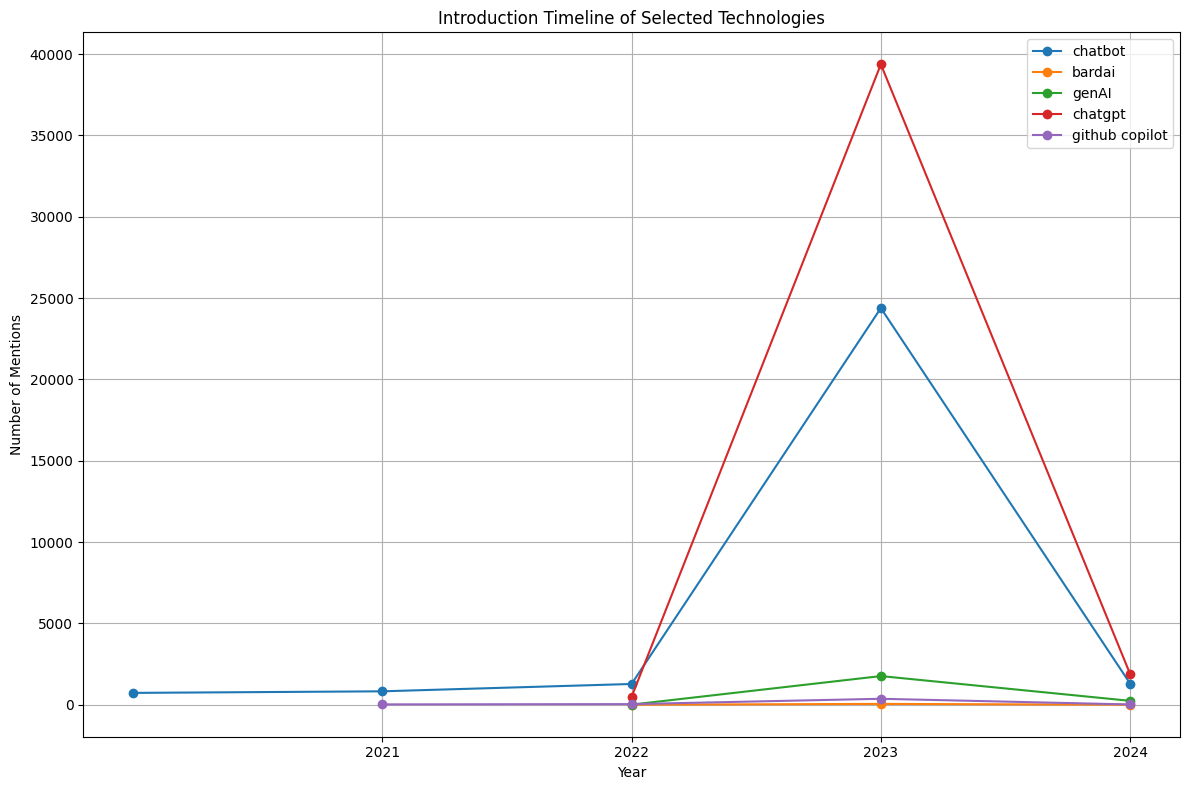

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert counts to pandas Series
technology_counts = {tech: pd.Series(counts) for tech, counts in technology_counts.items()}

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through the technologies and plot each one
for tech, counts in technology_counts.items():
    # Ensure that x-axis ticks represent whole numbers (integer years)
    x_ticks = range(int(counts.index.min()), int(counts.index.max()) + 1)
    plt.plot(counts.index, counts.values, label=tech, marker='o', linestyle='-')
    plt.xticks(x_ticks)  # Set the x-axis ticks to integer values

# Adding plot title and labels
plt.title('Introduction Timeline of Selected Technologies')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
# Assuming you have lists of top organizations and people
top_organizations = ['Microsoft', 'Google', 'Gray Television, Inc', 'Media Group, Inc.', 'FCC', 'IBM', 'Intel', 'Samsung', 'NPR', 'GPT']
top_people = ['Sam Altman', 'Joe Biden', 'Pichai', 'Taylor', 'Van Susteren', 'Satya Nadella', 'Max', 'Mark Zuckerberg', 'Khan', 'Matt OBrien']

# Combine top entities for analysis
top_entities = top_organizations + top_people

# Function to calculate sentiment distribution for an entity
def sentiment_distribution_for_entity(entity, dataframe):
    # Filter dataframe for rows containing the entity in 'cleaned_text'
    df_entity = dataframe[dataframe['cleaned_text'].str.contains(entity, case=False, na=False)]
    # Get sentiment counts
    sentiment_counts = df_entity['sentiment'].value_counts(normalize=True) * 100  # Convert to percentage
    return sentiment_counts




In [20]:
top_locations = ['United States', 'India', 'China', 'Japan', 'Germany', 'United Kingdom', 'France', 'Canada', 'Australia', 'Brazil']  # Example list

In [63]:
# Analyze sentiment distribution for each top entity
entity_sentiment_distribution = {}
for entity in top_entities:
    entity_sentiment_distribution[entity] = sentiment_distribution_for_entity(entity, df_ai_filtered)

# Display the sentiment distribution for each entity
for entity, distribution in entity_sentiment_distribution.items():
    print(f"Entity: {entity}, Sentiment Distribution: {distribution}\n")

Entity: Microsoft, Sentiment Distribution: sentiment
negative    78.031058
positive    21.968942
Name: proportion, dtype: float64

Entity: Google, Sentiment Distribution: sentiment
negative    75.973504
positive    24.026496
Name: proportion, dtype: float64

Entity: Gray Television, Inc, Sentiment Distribution: sentiment
negative    63.677251
positive    36.322749
Name: proportion, dtype: float64

Entity: Media Group, Inc., Sentiment Distribution: sentiment
negative    63.77943
positive    36.22057
Name: proportion, dtype: float64

Entity: FCC, Sentiment Distribution: sentiment
negative    72.003292
positive    27.996708
Name: proportion, dtype: float64

Entity: IBM, Sentiment Distribution: sentiment
negative    76.376672
positive    23.623328
Name: proportion, dtype: float64

Entity: Intel, Sentiment Distribution: sentiment
negative    75.467042
positive    24.532958
Name: proportion, dtype: float64

Entity: Samsung, Sentiment Distribution: sentiment
negative    63.672635
positive    

In [ ]:
df_ai_filtered

In [ ]:
# Save as Parquet file
df_ai_filtered.to_parquet('FINALWITHEVERYTHING.parquet', index=False)

In [23]:
# Assuming top_locations is your list of top location entities
top_locations = ['United States', 'China', 'India', 'Germany', 'United Kingdom', 'France', 'Canada', 'Australia', 'Japan', 'Brazil']

# Function to calculate sentiment distribution for each location
def sentiment_distribution_for_locations(location_list, dataframe):
    sentiment_scores = {}
    for location in location_list:
        # Filter the DataFrame for rows where the location is mentioned in 'cleaned_text'
        df_location = dataframe[dataframe['cleaned_text'].str.contains(location, case=False, na=False)]
        # Calculate the sentiment distribution as a percentage
        sentiment_distribution = df_location['sentiment'].value_counts(normalize=True) * 100
        sentiment_scores[location] = sentiment_distribution
    return sentiment_scores

# Get sentiment scores for top locations
location_sentiment_scores = sentiment_distribution_for_locations(top_locations, df_ai_filtered)

# Display the sentiment distribution for each location
for location, distribution in location_sentiment_scores.items():
    print(f"Location: {location}, Sentiment Distribution: {distribution}\n")


Location: United States, Sentiment Distribution: sentiment
Positive    94.718047
Negative     5.254483
Neutral      0.027469
Name: proportion, dtype: float64

Location: China, Sentiment Distribution: sentiment
Positive    92.883106
Negative     7.037478
Neutral      0.079416
Name: proportion, dtype: float64

Location: India, Sentiment Distribution: sentiment
Positive    94.350117
Negative     5.609350
Neutral      0.040533
Name: proportion, dtype: float64

Location: Germany, Sentiment Distribution: sentiment
Positive    96.871683
Negative     3.100385
Neutral      0.027931
Name: proportion, dtype: float64

Location: United Kingdom, Sentiment Distribution: sentiment
Positive    96.420146
Negative     3.549082
Neutral      0.030772
Name: proportion, dtype: float64

Location: France, Sentiment Distribution: sentiment
Positive    95.347869
Negative     4.631316
Neutral      0.020815
Name: proportion, dtype: float64

Location: Canada, Sentiment Distribution: sentiment
Positive    95.525409


In [12]:
# Keywords related to investment, collaboration, innovation, funding, partnership, etc.
investment_keywords = [
    'investment', 'collaboration', 'innovation', 'funding', 'partnership', 'launch', 'venture', 'capital',
    'seed funding', 'angel investor', 'private equity', 'startup', 'entrepreneurship', 'acquisition', 
    'strategic investment', 'business development', 'angel investment', 'angel funding', 'crowdfunding', 
    'seed round', 'series a funding', 'series b funding', 'series c funding', 'capital infusion', 
    'investment round', 'fundraising', 'angel round', 'equity financing', 'capital investment'
]


# Convert keywords list to a regular expression pattern
pattern = '|'.join(investment_keywords)

# Filter documents containing at least one keyword
filtered_documents = df_ai_filtered[df_ai_filtered['cleaned_text'].str.contains(pattern)]

# Display the filtered documents
print(filtered_documents)
filtered_documents = filtered_documents[filtered_documents['sentiment'] == 'Positive']



                                                      url       date language  \
0       http://galusaustralis.com/2020/02/486473/legal... 2020-02-26       en   
1       http://newsparliament.com/2020/02/27/children-... 2020-02-27       en   
2       http://www.millenniumpost.in/big-stories/ai-ex... 2020-08-07       en   
4       http://www.pentictonherald.ca/entertainment/na... 2020-12-08       en   
5       http://www.peripherals.consumerelectronicsnet.... 2021-02-25       en   
...                                                   ...        ...      ...   
176899  https://www.wymt.com/prnewswire/2023/09/13/sta... 2023-09-13       en   
176900  https://www.wymt.com/prnewswire/2023/12/19/ato... 2023-12-19       en   
176901  https://www.zdnet.com/article/chatgpt-is-the-m... 2023-05-02       en   
176902  https://yen.com.gh/business-economy/231589-twi... 2023-04-12       en   
176905  https://zeenews.india.com/technology/young-kol... 2023-08-05       en   

                           

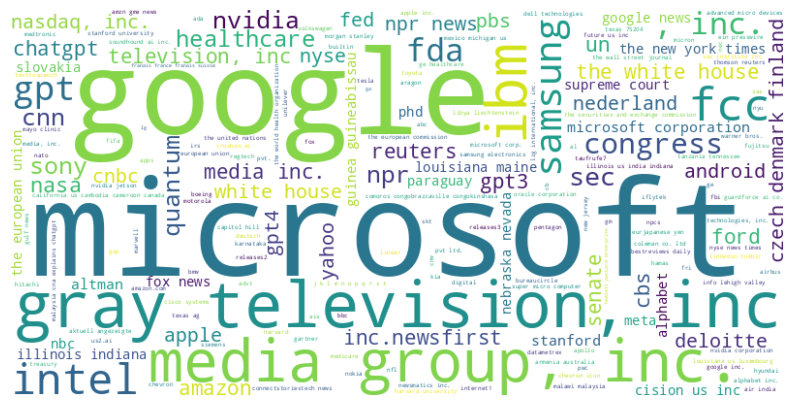

In [17]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Initialize a Counter to count the organizations/entities
organization_counter = Counter()

# Iterate over the entities in filtered documents
for entities_list in filtered_documents['entities']:
    # Iterate over each entity in the list
    for entity in entities_list:
        # Increment the counter for this entity
        organization_counter[entity] += 1

# Convert the Counter object to a dictionary
organization_dict = dict(organization_counter)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(organization_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


[('gmt contact us general enquiries media enquiries partnerships', 347), ('navbharattimespointsindiatimesbrand capitaleducation timestimes foodmiss', 198), ('healthcare ai acquisition corp.', 170), ('reseller news innovation', 166), ('tola capital', 166), ('investments ltd 2023', 162), ('ittech internetfundingstartupstech bytesnewslettersfull stacktech', 154), ('kindred ventures', 141), ('internetfundingstartupstech', 130), ('the israel innovation authority', 94)]


In [7]:
# Convert the list of keywords into a regex pattern, separated by '|', for OR condition in regex search
keywords_pattern = '|'.join(investment_keywords)

# Filter the DataFrame for articles that contain any of the investment-related keywords
df_investment_mentions = df_ai_filtered[df_ai_filtered['cleaned_text'].str.contains(keywords_pattern, case=False, regex=True)]

df_investment_mentions.head()

KeyboardInterrupt: 

In [37]:
df_investment_mentions

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities,filtered_person_entities,location_entities
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]","[boen healthcare, jorgensen]","[midmark, medicatech, lawgeex, united states, ..."
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around...","[u.s., italy, u.s., italy, los angeles, u.s., ..."
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[india, dubai]"
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid...","[ruth klahsen, gordon, dan chameroys, roy lewi...","[toronto, u.s., netflix]"
5,http://www.peripherals.consumerelectronicsnet....,2021-02-25,en,MulticoreWare Inc. Becomes CEVA’s Trusted Part...,\n\nMulticoreWare Inc. Becomes CEVA’s Trusted ...,multicoreware inc. becomes cevas trusted partn...,718,Positive,"[multicoreware inc., homenewsmulticoreware inc...","[becomes cevas, becomes cevas, becomes cevas, ...","[becomes cevas, becomes cevas, becomes cevas, ...","[san jose, smart city]"
...,...,...,...,...,...,...,...,...,...,...,...,...
176899,https://www.wymt.com/prnewswire/2023/09/13/sta...,2023-09-13,en,"Stability AI launches Stable Audio, the Compan...","Stability AI launches Stable Audio, the Compan...","stability ai launches stable audio, the compan...",596,Positive,"[media group, inc., gray television, inc]",[],[],[agolondon]
176900,https://www.wymt.com/prnewswire/2023/12/19/ato...,2023-12-19,en,Atomicwork's 'State of AI in IT' Report Reveal...,Atomicwork's 'State of AI in IT' Report Reveal...,atomicworks state of ai in it report reveals a...,590,Positive,"[microsoft, media group, inc., gray television...",[agosan francisco],[agosan francisco],"[san francisco, singapore]"
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]","[mac mini, zdnet france, mac mini, sabrina ortiz]","[india, united kingdom united states, germany,..."
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ...","[jim watson, alsochina, steve wozniak, stella ...","[ghana, ghana, san francisco, san francisco, g..."


In [44]:
sector_mapping = {
    'tech': [
        'AI', 'machine learning', 'deep learning', 'computing', 'natural language processing', 'computer vision',
        'neural networks', 'quantum computing', 'augmented reality', 'virtual reality', 'cybersecurity',
        'blockchain', 'data analytics', 'big data', 'internet of things', 'IoT', 'cloud computing', 'edge computing',
        'software development', 'app development', 'web development', 'mobile technology', '5G', 'smart devices',
        'robotics', 'drones', 'autonomous vehicles', 'AI ethics', 'AI governance'
    ],
    'healthcare': [
        'telemedicine', 'biotechnology', 'clinical trials', 'precision medicine', 'genomics', 'pharmacogenomics',
        'medical imaging', 'health informatics', 'electronic health records', 'EHR', 'patient monitoring systems',
        'wearable technology', 'digital health', 'health data analytics', 'robotic surgery', 'mental health apps',
        'vaccine research', 'immunotherapy', 'stem cell therapy'
    ],
    'finance': [
        'fintech', 'blockchain', 'cryptocurrency', 'digital currency', 'mobile payments', 'payment systems',
        'insurtech', 'robo-advisors', 'wealth management technology', 'regtech', 'financial modeling',
        'credit scoring', 'fraud detection', 'algorithmic trading', 'smart contracts', 'decentralized finance', 'DeFi',
        'financial planning apps'
    ],
    'education': [
        'e-learning', 'digital classrooms', 'online courses', 'adaptive learning', 'educational apps',
        'learning management systems', 'LMS', 'MOOCs', 'virtual reality in education', 'gamification',
        'student data analytics', 'AI tutors', 'distance learning technology', 'STEM education tools',
        'language learning apps'
    ],
    'energy': [
        'smart grids', 'renewable energy technology', 'solar energy tech', 'wind energy tech', 'battery technology',
        'energy storage solutions', 'electric vehicles', 'EV charging infrastructure', 'grid modernization',
        'energy management systems', 'carbon capture and storage', 'CCS', 'nuclear fusion technology',
        'hydrogen fuel technology', 'smart meters'
    ],
    'manufacturing': [
        'industrial IoT', 'IIoT', '3D printing', 'additive manufacturing', 'robotic process automation', 'RPA',
        'supply chain optimization', 'predictive maintenance', 'quality control automation', 'computer-aided design',
        'CAD', 'computer-aided manufacturing', 'CAM', 'digital twins', 'smart factories', 'augmented reality for assembly'
    ],
    'retail': [
        'e-commerce technology', 'customer experience tech', 'personalization technology', 'retail analytics',
        'supply chain management tech', 'inventory management systems', 'point of sale systems', 'POS',
        'augmented reality shopping', 'virtual fitting rooms', 'chatbots for customer service', 'payment technology',
        'loyalty program technology', 'omnichannel retailing'
    ],
    'environment': [
        'climate change technology', 'sustainability technology', 'carbon footprint reduction', 'renewable energy',
        'waste management technology', 'clean energy solutions', 'environmental monitoring', 'carbon offsetting',
        'green building technology', 'pollution control technology', 'water purification technology', 'sustainable agriculture'
    ],
    'transportation': [
        'smart transportation', 'public transportation technology', 'urban mobility solutions', 'ride-sharing technology',
        'micro-mobility solutions', 'autonomous vehicles', 'connected vehicles', 'traffic management technology',
        'logistics technology', 'fleet management solutions', 'electric vehicle infrastructure', 'mobility-as-a-service',
        'parking technology', 'traffic analytics'
    ],
    'telecommunications': [
        '5G technology', 'fiber optic networks', 'satellite communication', 'mobile networks', 'network infrastructure',
        'telecom software', 'telecom services', 'internet services', 'voice over IP', 'VoIP', 'wireless communication',
        'telecom security', 'network virtualization', 'telecom billing systems', 'telecom analytics', 'telecom regulation'
    ],
    'agriculture': [
        'precision agriculture', 'agritech', 'smart farming', 'agricultural drones', 'farm management software',
        'crop monitoring technology', 'soil health monitoring', 'livestock monitoring technology', 'agricultural robots',
        'crop protection technology', 'farm automation', 'agricultural biotechnology', 'crop genetics', 'agricultural sensors',
        'irrigation technology'
    ],
    'entertainment': [
        'streaming technology', 'online gaming', 'e-sports', 'virtual events', 'streaming platforms', 'gaming consoles',
        'virtual reality gaming', 'augmented reality gaming', 'game development', 'live entertainment technology',
        'music streaming', 'video streaming', 'online content creation', 'interactive media', 'digital art'
    ],
    'construction': [
        'smart construction', 'building information modeling', 'BIM', 'construction robotics', 'prefabrication technology',
        '3D construction printing', 'smart materials', 'construction management software', 'digital twin technology',
        'building automation systems', 'construction drones', 'sustainable construction', 'green building materials',
        'modular construction', 'construction data analytics'
    ],
    'space': [
        'space exploration technology', 'satellite technology', 'rocket technology', 'spacecraft technology', 'space tourism',
        'asteroid mining', 'space habitats', 'lunar exploration', 'Martian exploration', 'space telescopes',
        'space colonization', 'orbital habitats', 'space stations', 'space robotics', 'extraterrestrial habitats'
    ],
    # Add more sectors as needed
}


In [51]:
# Function to categorize articles based on sectors
def categorize_article_sectors(entities_list, sector_mapping):
    sectors_found = []
    for sector, keywords in sector_mapping.items():
        if any(keyword in entities_list for keyword in keywords):
            sectors_found.append(sector)
    return sectors_found

# Assuming 'entities' column contains lists of entities identified in each article
df_investment_mentions['sectors'] = df_investment_mentions['entities'].apply(lambda entities: categorize_article_sectors(entities, sector_mapping))

/var/tmp/ipykernel_6179/1465759323.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_investment_mentions['sectors'] = df_investment_mentions['entities'].apply(lambda entities: categorize_article_sectors(entities, sector_mapping))


In [52]:
# Flatten the sectors list to count occurrences
sectors_flat_list = [sector for sublist in df_ai_filtered['sectors'] for sector in sublist]

# Count occurrences
from collections import Counter
sector_counts = Counter(sectors_flat_list)

# Convert to DataFrame for easy handling
df_sector_counts = pd.DataFrame(sector_counts.items(), columns=['Sector', 'Count']).sort_values(by='Count', ascending=False)


In [53]:
df_sector_counts

,Sector,Count
1,tech,294
0,finance,182
3,manufacturing,47
2,agriculture,12
4,healthcare,7
5,energy,1


In [49]:
# Assuming df_investment_mentions is your DataFrame
df_investment_mentions.to_parquet('investment_mentions.parquet')


In [ ]:
import pandas as pd

# Read the Parquet file into a DataFrame
df = pd.read_parquet('investment_mentions.parquet')


In [54]:
# Explode the 'sectors' column to separate rows for each sector
df_ai_filtered_exploded = df_ai_filtered.explode('sectors')

# Count the occurrences of each sector
sector_counts = df_ai_filtered_exploded['sectors'].value_counts()

# Print the sector counts
print("Sector\tCount")
print(sector_counts)


Sector	Count
sectors
tech             294
finance          182
manufacturing     47
agriculture       12
healthcare         7
energy             1
Name: count, dtype: int64


In [63]:
failure_mapping.update({
    'natural_language_generation': ['misgeneration', 'semantic errors', 'contextual misunderstanding', 'grammatical inaccuracies'],
    'chatbots': ['miscommunication', 'poor user experience', 'response inaccuracies', 'contextual errors'],
    'virtual_assistants': ['misinterpretation', 'inability to understand context', 'incorrect responses', 'lack of personalization'],
    'computer_vision': ['misinterpretation of images', 'object detection errors', 'recognition inaccuracies', 'data bias'],
    'speech_recognition': ['misinterpretation of speech', 'inaccuracy in transcribing', 'dialect recognition issues', 'background noise interference'],
    'recommendation_systems': ['incorrect recommendations', 'filter bubble creation', 'lack of diversity in suggestions', 'personalization errors'],
    'algorithmic_trading': ['trading errors', 'financial losses', 'market manipulation', 'overfitting of models'],
    'smart_contracts': ['coding errors', 'vulnerabilities', 'execution failures', 'inadequate testing'],
    'AI-driven_decision_making': ['bias in decision-making', 'inaccurate predictions', 'unintended consequences', 'lack of transparency'],
    'IoT_devices': ['security vulnerabilities', 'data breaches', 'device malfunctions', 'lack of interoperability'],
    'cloud_computing': ['data breaches', 'downtime', 'data loss', 'privacy concerns'],
    'edge_computing': ['performance issues', 'scalability challenges', 'security risks', 'data integrity problems'],
    'wearable_technology': ['inaccuracy in data collection', 'privacy concerns', 'data security vulnerabilities', 'compatibility issues'],
    'smart_home_devices': ['privacy risks', 'security vulnerabilities', 'malfunctions', 'lack of user control'],
    'social_media': ['privacy breaches', 'data misuse', 'spread of misinformation', 'algorithmic biases'],
    'online_marketplaces': ['fraudulent activities', 'seller scams', 'counterfeit products', 'privacy breaches'],
    'digital_identity_systems': ['identity theft', 'data breaches', 'authentication failures', 'lack of user consent'],
    'online_payment_systems': ['fraudulent transactions', 'security breaches', 'transaction errors', 'payment disputes']
})


In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter


# Assuming df_failure_mentions contains articles with negative sentiment towards AI
# and 'cleaned_text' column has been processed for failure-related keyword analysis
failure_keywords.extend([
    'failure', 'unsuccessful', 'unreliable', 'unstable', 'unusable',
    'malfunction', 'malfunctioning', 'breakdown', 'disruption',
    'mistake', 'error-prone', 'inaccuracy', 'inefficiency',
    'ineffectiveness', 'lack', 'missing', 'omission', 'defectiveness',
    'deficient', 'inadequate', 'unfit', 'unfitting', 'unsuitable',
    'unavailable', 'unusable', 'subpar', 'substandard', 'unacceptable',
    'undesirable', 'unfavorable', 'unwanted', 'unfortunate',
    'unfavorable', 'poor', 'bad', 'inferior', 'worse', 'worst',
    'negative', 'dissatisfactory', 'unsatisfactory', 'improper',
    'imperfect', 'unsuccessful', 'unfulfilled', 'incomplete',
    'imprecise', 'unresolved', 'unmet', 'unaddressed', 'unresolved',
    'unresolved', 'lackluster', 'flawed', 'faulty', 'unworkable',
    'unreliable', 'untrustworthy', 'unstable', 'fragile', 'brittle'
])

df_failure_mentions = df_ai_filtered[df_ai_filtered['sentiment'] == 'negative']
df_failure_mentions = df_failure_mentions[df_failure_mentions['cleaned_text'].str.contains('|'.join(failure_keywords), case=False)]




NameError: name 'failure_keywords' is not defined

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain
from collections import Counter


# Assuming df_failure_mentions contains articles with negative sentiment towards AI
# and 'cleaned_text' column has been processed for failure-related keyword analysis
failure_keywords([
    'failure', 'unsuccessful', 'unreliable', 'unstable', 'unusable',
    'malfunction', 'malfunctioning', 'breakdown', 'disruption',
    'mistake', 'error-prone', 'inaccuracy', 'inefficiency',
    'ineffectiveness', 'lack', 'missing', 'omission', 'defectiveness',
    'deficient', 'inadequate', 'unfit', 'unfitting', 'unsuitable',
    'unavailable', 'unusable', 'subpar', 'substandard', 'unacceptable',
    'undesirable', 'unfavorable', 'unwanted', 'unfortunate',
    'unfavorable', 'poor', 'bad', 'inferior', 'worse', 'worst',
    'negative', 'dissatisfactory', 'unsatisfactory', 'improper',
    'imperfect', 'unsuccessful', 'unfulfilled', 'incomplete',
    'imprecise', 'unresolved', 'unmet', 'unaddressed', 'unresolved',
    'unresolved', 'lackluster', 'flawed', 'faulty', 'unworkable',
    'unreliable', 'untrustworthy', 'unstable', 'fragile', 'brittle'
])

df_failure_mentions = df_ai_filtered[df_ai_filtered['sentiment'] == 'negative']
df_failure_mentions = df_failure_mentions[df_failure_mentions['cleaned_text'].str.contains('|'.join(failure_keywords), case=False)]


# Using a function similar to categorize_article_sectors but tailored for identifying failures
df_failure_mentions['failure_categories'] = df_failure_mentions['entities'].apply(lambda entities: categorize_article_sectors(entities, failure_mapping))



NameError: name 'failure_keywords' is not defined

In [66]:
# Example function to check for failure mentions in text
def check_failure_mentions(text, failure_mapping):
    failures_found = []
    for area, failure_keywords in failure_mapping.items():
        if any(keyword in text for keyword in failure_keywords):
            failures_found.append(area)
    return failures_found

# Apply the function to each row in your DataFrame
df_ai_filtered['failures'] = df_ai_filtered['cleaned_text'].apply(lambda text: check_failure_mentions(text, failure_mapping))

# Flatten the list of failures and count occurrences
failure_mentions = df_ai_filtered['failures'].explode().value_counts()


In [67]:
failure_mentions

failures
natural_language_processing    14731
ethical_ai                     14442
healthcare                      7837
general_ai_challenges           3991
cloud_computing                 3872
smart_contracts                 2584
image_recognition               2022
wearable_technology             1917
edge_computing                  1641
digital_identity_systems        1211
cybersecurity                   1078
IoT_devices                     1058
AI-driven_decision_making       1043
robotics                        1014
autonomous_vehicles              939
finance                          916
smart_home_devices               808
social_media                     692
online_payment_systems           386
online_marketplaces              309
virtual_assistants               190
algorithmic_trading              161
chatbots                         146
computer_vision                  103
data_privacy                      55
education                         36
recommendation_systems       

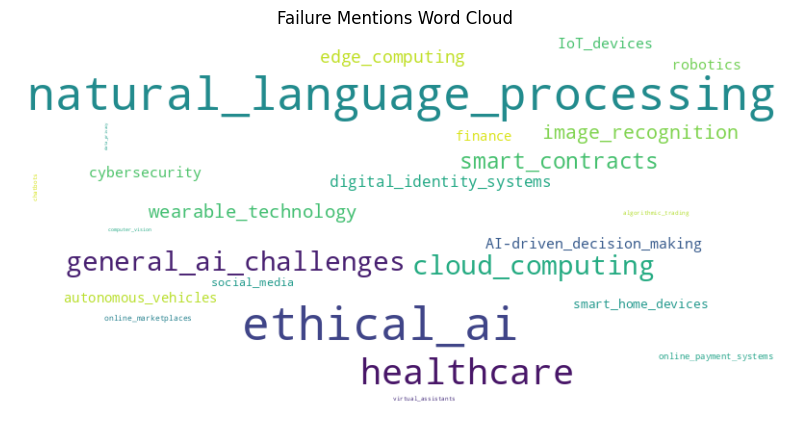

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud from the failure mentions data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(failure_mentions)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Failure Mentions Word Cloud')
plt.show()


In [70]:
df_ai_filtered

,url,date,language,title,text,cleaned_text,word_count,sentiment,entities,person_entities,filtered_person_entities,location_entities,sectors,failures
0,http://galusaustralis.com/2020/02/486473/legal...,2020-02-26,en,LegalTech Artificial Intelligence Market 2019 ...,LegalTech Artificial Intelligence Market 2019 ...,legaltech artificial intelligence market 2019 ...,935,Positive,"[legaltech, casetext inc., apollo, sony, heska...","[boen healthcare, jorgensen]","[boen healthcare, jorgensen]","[midmark, medicatech, lawgeex, united states, ...",[finance],[]
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,children with autism saw their learning and so...,1553,Positive,"[dettol, the university of southern california...","[shomik jain, zhonghao shi, haotian mai around...","[shomik jain, zhonghao shi, haotian mai around...","[u.s., italy, u.s., italy, los angeles, u.s., ...",[],[]
2,http://www.millenniumpost.in/big-stories/ai-ex...,2020-08-07,en,Two dead as AI Express flight skids off Kozhik...,Two dead as AI Express flight skids off Kozhik...,two dead as ai express flight skids off kozhik...,263,Negative,"[airportxians7, hocalwirewe]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[gmt kozhikode kerala, pinarayi vijayan, a.c.]","[india, dubai]",[],[]
3,http://www.nativestew.com/2023/11/ai-took-my-j...,2023-11-20,en,"Native Stew - Bahamas AI Art, Photos, Videos: ...","\nNative Stew - Bahamas AI Art, Photos, Videos...","native stew bahamas ai art, photos, videos ai ...",326,Positive,"[junkanoo marine life montagu, wells sunrise]","[a. derek catalano, bush, george dock]","[a. derek catalano, bush, george dock]","[bahamas, bahamas, bahamas]",[],[]
4,http://www.pentictonherald.ca/entertainment/na...,2020-12-08,en,From the Bard to broadcaster: Stratford Festiv...,\n\nFrom the Bard to broadcaster: Stratford Fe...,from the bard to broadcaster stratford festiva...,1529,Positive,"[national news world news medical foundation, ...","[covid19, covid19, ruth klahsen, gordon, covid...","[ruth klahsen, gordon, dan chameroys, roy lewi...","[toronto, u.s., netflix]",[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176901,https://www.zdnet.com/article/chatgpt-is-the-m...,2023-05-02,en,ChatGPT is the most sought out tech skill in t...,\n\n\nChatGPT is the most sought out tech skil...,chatgpt is the most sought out tech skill in t...,1239,Positive,"[chatgpt, congress, google microsoft professio...","[mac mini, zdnet france, mac mini, sabrina ortiz]","[mac mini, zdnet france, mac mini, sabrina ortiz]","[india, united kingdom united states, germany,...",[],[]
176902,https://yen.com.gh/business-economy/231589-twi...,2023-04-12,en,Twitter working on AI despite Musk call for gl...,\n\nTwitter working on AI despite Musk call fo...,twitter working on ai despite musk call for gl...,1060,Positive,"[telegram, apple, musk.read, google, meta, mic...","[jim watson, alsochina, steve wozniak, stella ...","[jim watson, alsochina, steve wozniak, stella ...","[ghana, ghana, san francisco, san francisco, g...",[],[]
176903,https://zeenews.india.com/companies/one-ai-kil...,2022-12-31,en,'One AI Killer app will emerge...': Nothing fo...,'One AI Killer app will emerge...': Nothing fo...,one ai killer app will emerge... nothing found...,780,Negative,[australia test series urvashi rautela urvashi...,"[carl pei, carl pei, carl pei, carl pei, kocha...","[carl pei, carl pei, carl pei, carl pei, kocha...","[astro, picsnew delhi, delhi, india, afghanistan]",[],[]
176904,https://zeenews.india.com/technology/openai-re...,2023-04-29,en,OpenAI Restores Access To ChatGPT In Italy Aft...,OpenAI Restores Access To ChatGPT In Italy Aft...,openai restores access to chatgpt in italy aft...,661,Positive,"[chatgpt, ram mandir]","[khanirrfan khan, kochar aquarians]","[khanirrfan khan, kochar aquarians]","[italy, italy, bana, italy, astro, picsnew del...",[],[]
